In [1]:
import pymysql.cursors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import connect_to_db as cn

In [18]:
# font 설정.
plt.rcParams.update({'font.family':'Arial'})

In [218]:
def draw_boxplot_for_hub(result_list, title, xlabel, ylabel, xlist, xticks_fontsize, yticks_fontsize, median_color='#ff7f0e'):
    if median_color == 'black':
        title = title + '_median_black'
        filename = title + '.eps'
    
    plt.rcParams['figure.figsize'] = [30, 20]

    plt.boxplot(result_list, showfliers=False, boxprops= dict(linewidth=10, color='black'),
               whiskerprops=dict(linestyle='-',linewidth=10, color='black'),
               capprops=dict(linewidth=10), medianprops=dict(linewidth=10, color=median_color))
    
    # plt.xticks([1, 2, 3, 4, 5, 6], xlabel, fontsize=20)
    plt.xticks(xlist, xlabel, fontsize=xticks_fontsize)
    plt.yticks(fontsize=yticks_fontsize)
    # plt.ylabel(ylabel, fontsize=40)
    plt.yscale('log')
    # plt.title(title, fontsize=30)
    
    plt.savefig(f"/home/mykim/source/plotting-and-graph-analysis/eps/{filename}", format='eps', bbox_inches='tight')
    
    plt.show()

In [213]:
# boxplot draw를 위한 color list를 필요한 개수에 맞게 생성.
def copy_elements(element_list, loop):
    elements = []
    for element in element_list:
        for i in range(loop):
            elements.append(element)
    return elements

In [235]:
num_of_boxplots = 4

def draw_colored_boxplot_for_hub(result_list, title, xlabel, ylabel, xlist, xticks_fontsize, yticks_fontsize, fill_box, colors=[], patterns=[], median_colors=['#ff7f0e', '#ff7f0e']):
    median_colors = copy_elements(colors, num_of_boxplots)
    plt.rcParams['hatch.linewidth'] = 5
    
    if fill_box == 'color':
        title = title + '_face_filled'
        box_colors = copy_elements(colors, num_of_boxplots)
    elif fill_box == 'pattern':
        title = title + '_face_filled_with_pattern'
        box_patterns = copy_elements(patterns, num_of_boxplots)
    elif fill_box == 'both':
        title = title + '_face_filled_with_color_and_pattern'
        box_colors = copy_elements(colors, num_of_boxplots)
        box_patterns = copy_elements(patterns, num_of_boxplots)
    else:
        box_colors = copy_elements(colors, num_of_boxplots)
    
    filename = title + '.eps'
    
    plt.rcParams['figure.figsize'] = [30, 20]
    
    fig, axes = plt.subplots(figsize=(30, 20))

    bplot = axes.boxplot(result_list, showfliers=False, boxprops= dict(linewidth=10),
                        whiskerprops=dict(linestyle='-',linewidth=10),
                        capprops=dict(linewidth=10), medianprops=dict(linewidth=10), patch_artist=True)
    
    for median, median_color in zip(bplot['medians'], median_colors):
        median.set_color(median_color)

    # box의 face를 parameter로 받은 colors로 채우기.
    if fill_box == 'color':
        for box, color in zip(bplot['boxes'], box_colors):
            box.set_facecolor(color)
    # box의 face를 parameter로 받은 patterns로 채우기.
    elif fill_box == 'pattern':
        for box, pattern in zip(bplot['boxes'], box_patterns):
            box.set(hatch = pattern)
            box.set_facecolor('None')
    # box의 face를 parameter로 받은 colors와 patterns로 채우기.
    elif fill_box == 'both':
        for box, color, pattern in zip(bplot['boxes'], box_colors, box_patterns):
            box.set_facecolor(color)
            box.set(hatch = pattern)
    # box의 edges를 parameter로 받은 colors로 채우기. 
    else:
        for box, color in zip(bplot['boxes'], box_colors):
            box.set_edgecolor(color)
            box.set_facecolor('None')
            
        line_colors = copy_colors(colors, num_of_boxplots * 2)
        for whisker, cap, color in zip(bplot['whiskers'], bplot['caps'], line_colors):
                # whiskers와 caps는 Line2D 객체이므로 set_color() function 사용.
                whisker.set_color(color)
                cap.set_color(color)
    
    plt.xticks(xlist, xlabel, fontsize=xticks_fontsize)
    plt.yticks(fontsize=yticks_fontsize)
    plt.yscale('log')
    
    [plt.axvline(4.5, color = 'black', linestyle='--', linewidth=10)]
    
    plt.savefig(f"/home/mykim/source/plotting-and-graph-analysis/eps/{filename}", format='eps', bbox_inches='tight')
    
    plt.show()

# Hub analysis for paper
##  only 0.1%, 1% hub

## Outdegree hub's indegree

In [219]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(4):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select indegree from nodes where top_k_outdegree = 0.1;')
sqls.append('select indegree from nodes where top_k_outdegree > 0.1;')
sqls.append('select indegree from nodes where top_k_outdegree <= 1;')
sqls.append('select indegree from nodes where top_k_outdegree > 1;')


for i in range(4):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(4):
    results[i] = pd.DataFrame(results[i])
    result_list.append(list(np.array(results[i]['indegree'].tolist())))

In [221]:
xlabel = ['0.1% hub', '99.9% non-hub', '1% hub', '99% non-hub']

### Median color orange

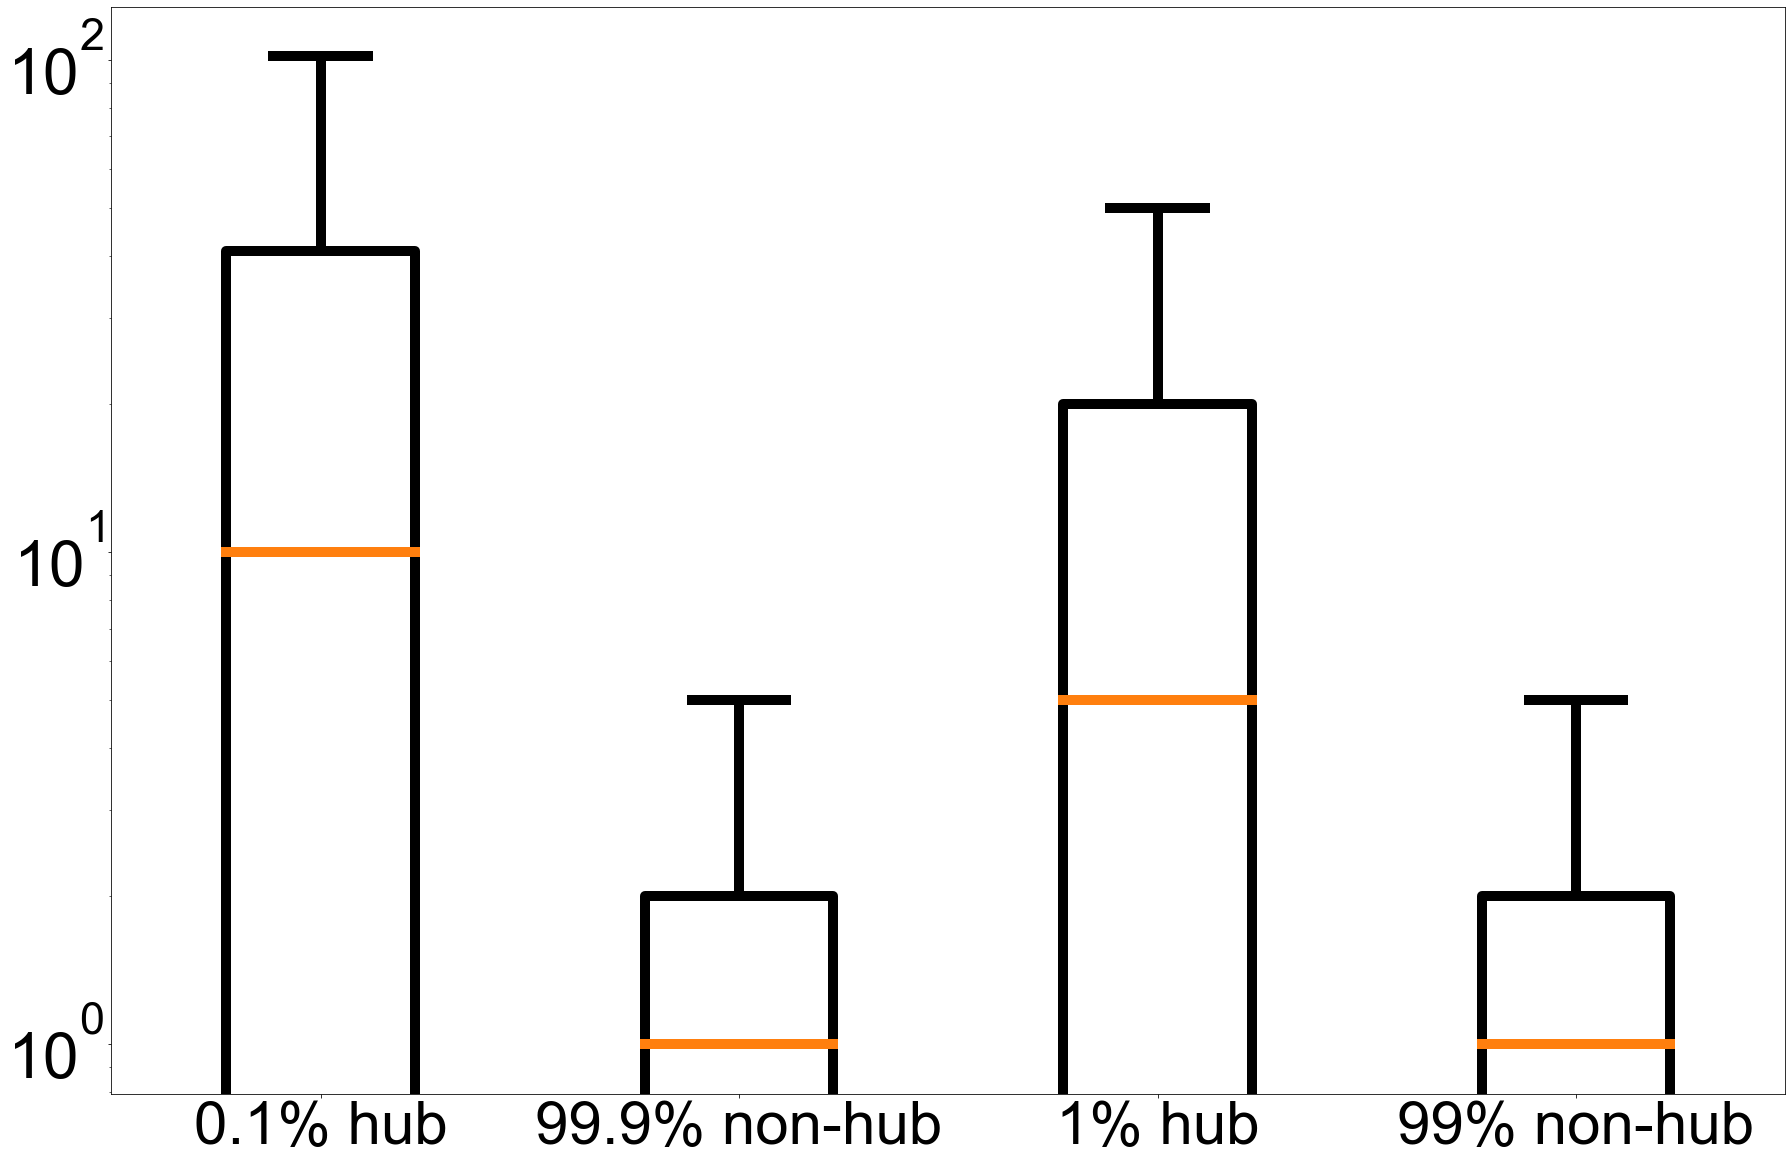

In [86]:
draw_boxplot_for_hub(result_list, "boxplot_indegree_of_outdegree_hub_non_hub", xlabel, 'indegree', [1, 2, 3, 4], xticks_fontsize=60, yticks_fontsize=64)

### Median color black

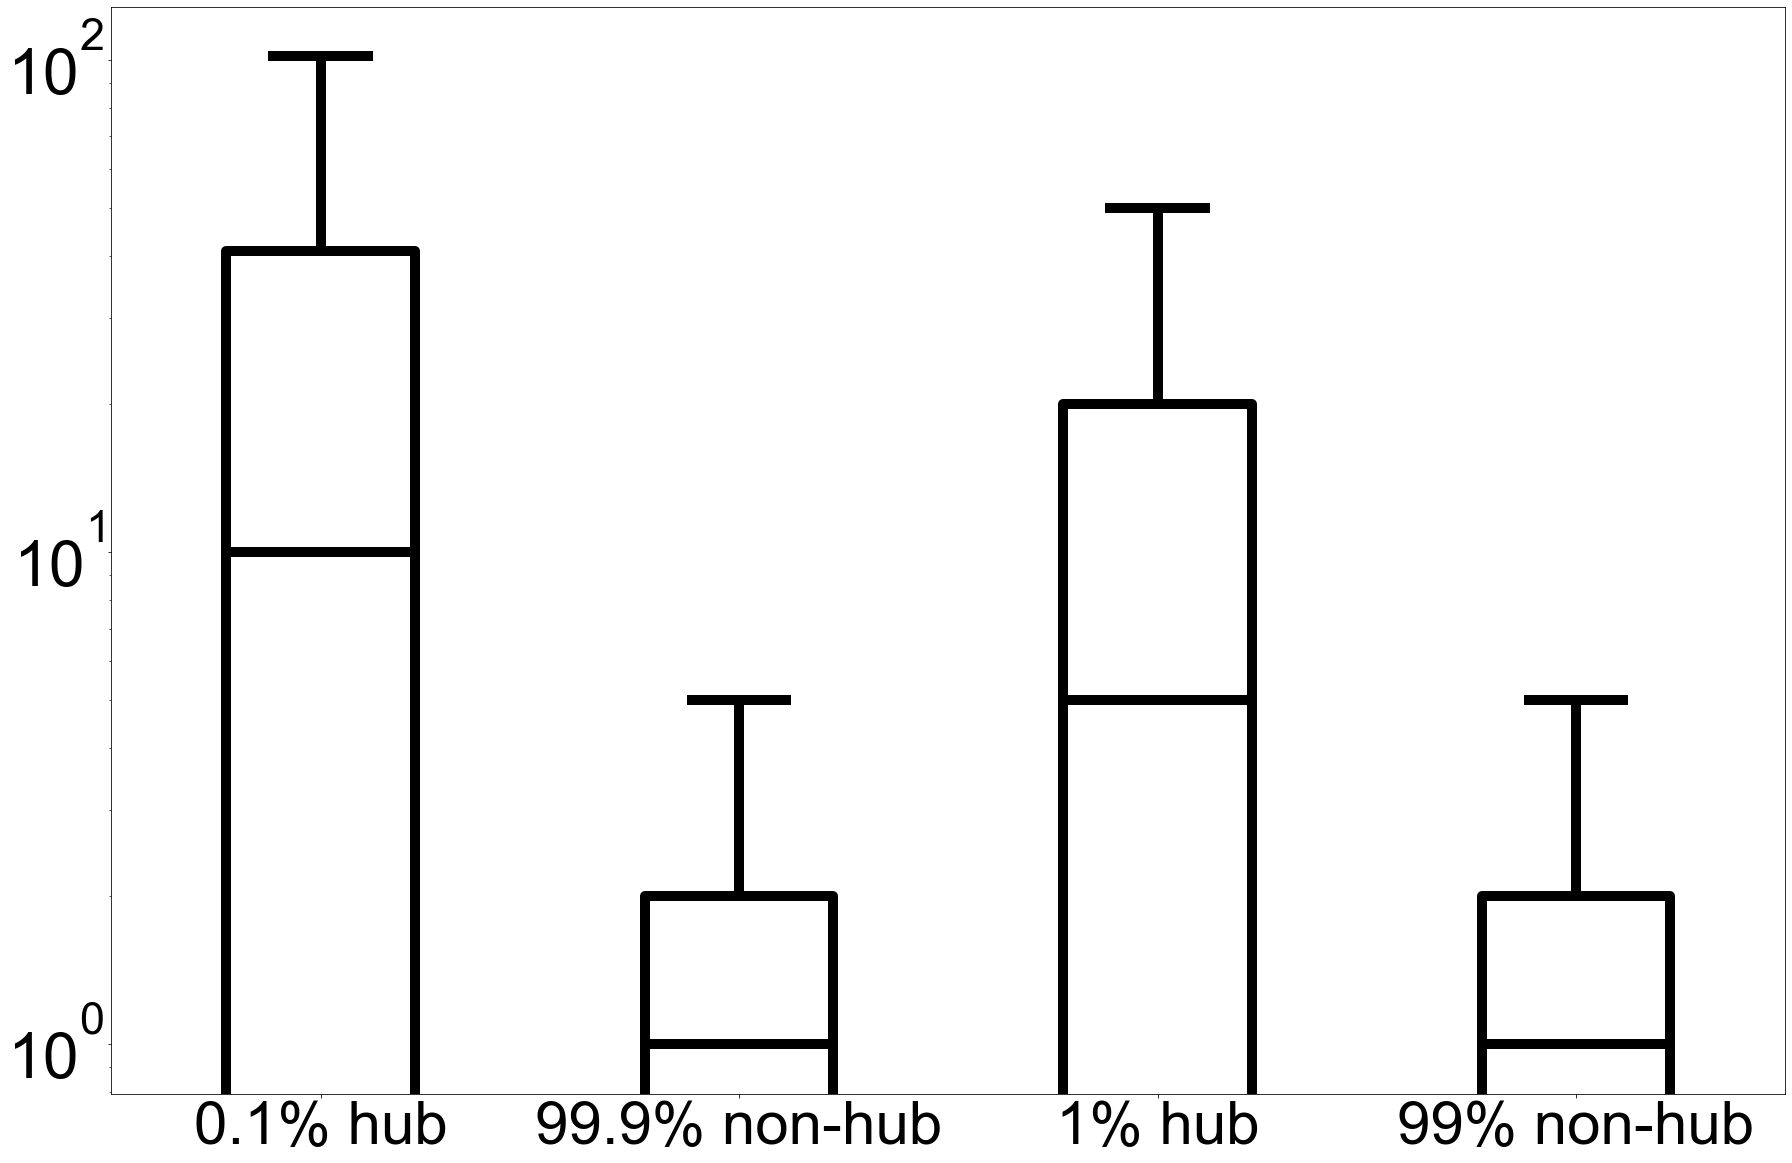

In [222]:
draw_boxplot_for_hub(result_list, "boxplot_indegree_of_outdegree_hub_non_hub", xlabel, 'indegree', [1, 2, 3, 4], xticks_fontsize=60, yticks_fontsize=64, median_color='black')

## Indegree hub's outdegree

In [87]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(4):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select outdegree from nodes where top_k_indegree = 0.1;')
sqls.append('select outdegree from nodes where top_k_indegree > 0.1;')
sqls.append('select outdegree from nodes where top_k_indegree <= 1;')
sqls.append('select outdegree from nodes where top_k_indegree > 1;')

for i in range(4):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(4):
    results[i] = pd.DataFrame(results[i])
    result_list.append(list(np.array(results[i]['outdegree'].tolist())))

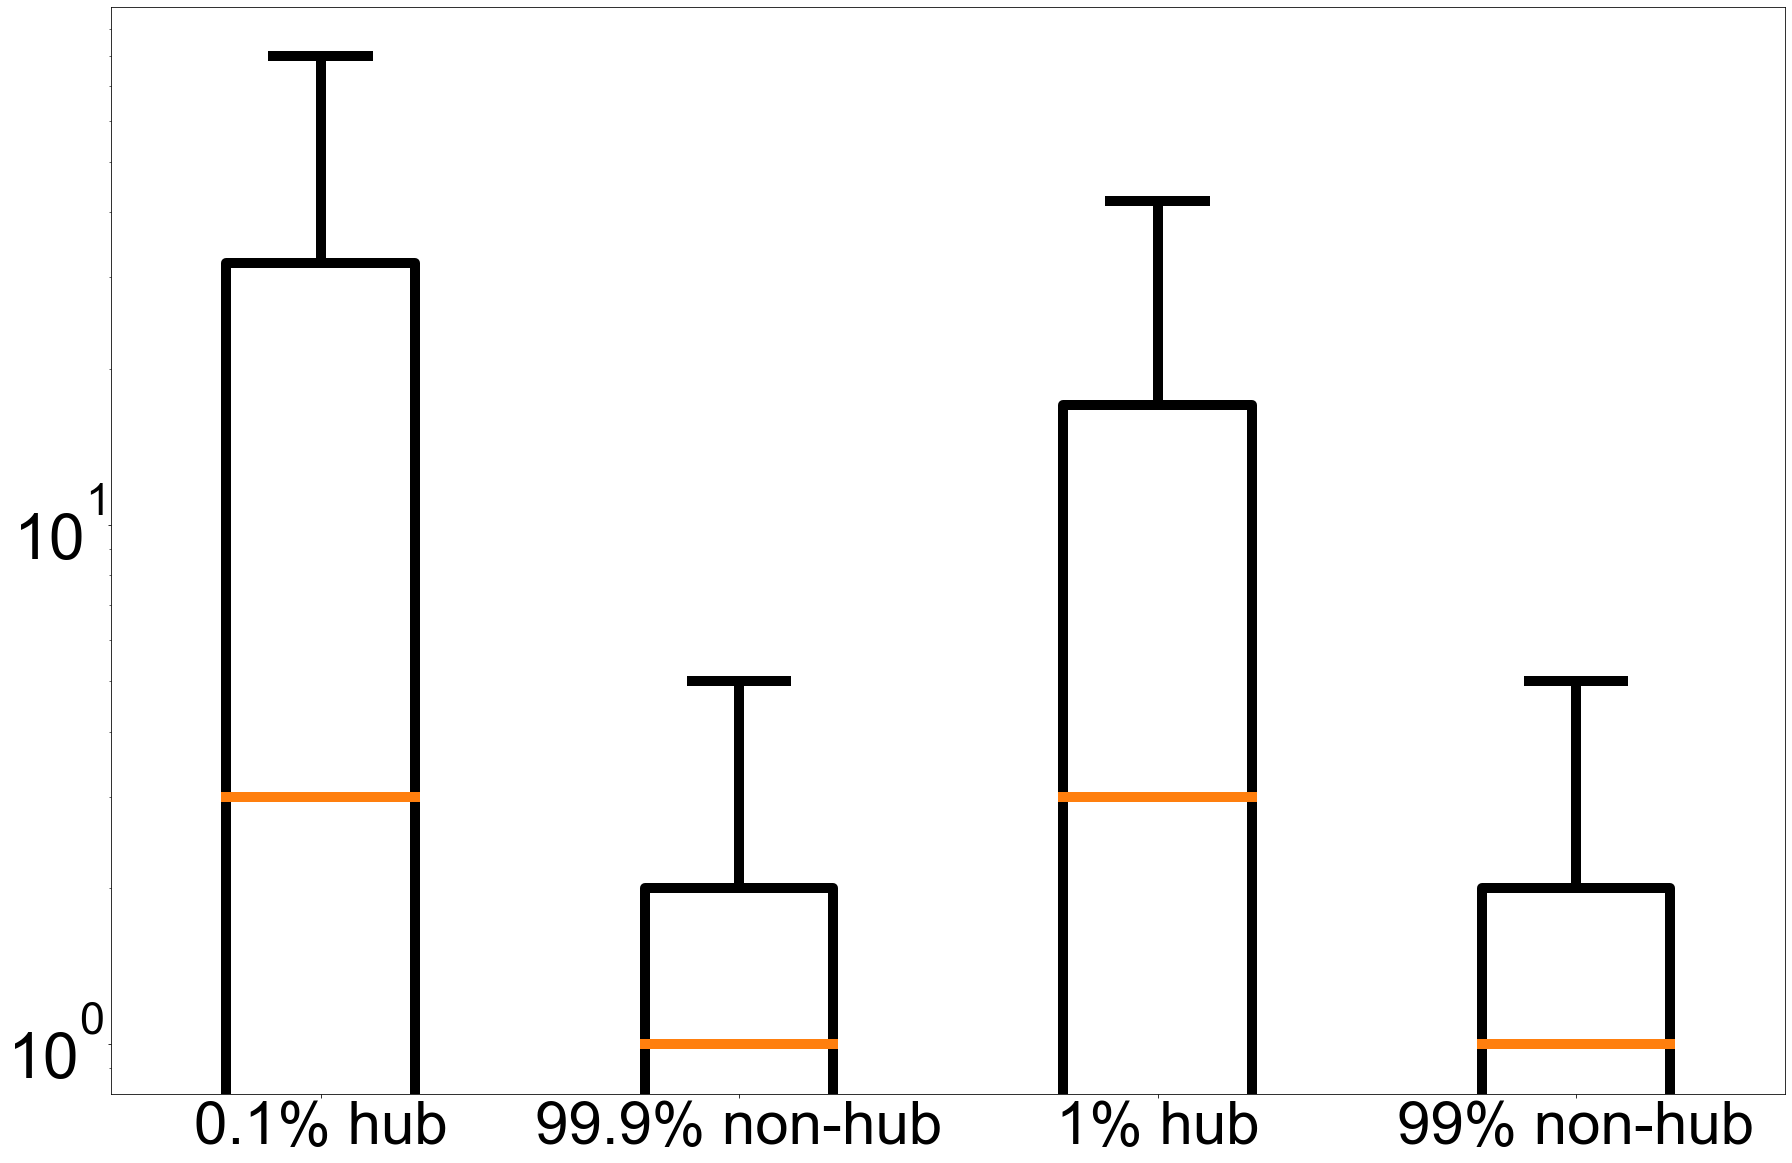

In [88]:
xlabel = ['0.1% hub', '99.9% non-hub', '1% hub', '99% non-hub']
draw_boxplot_for_hub(result_list, "boxplot_outdegree_of_indegree_hub_non_hub", xlabel, 'outdegree', [1, 2, 3, 4], xticks_fontsize=60, yticks_fontsize=64)

## Outdegree Hub's posts similarity & comments similarity

In [90]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(4):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.posts_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree = 0.1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 0.1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 1 and m.posts_similarity is not null;')

for i in range(4):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(4):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['posts_similarity'].tolist())))

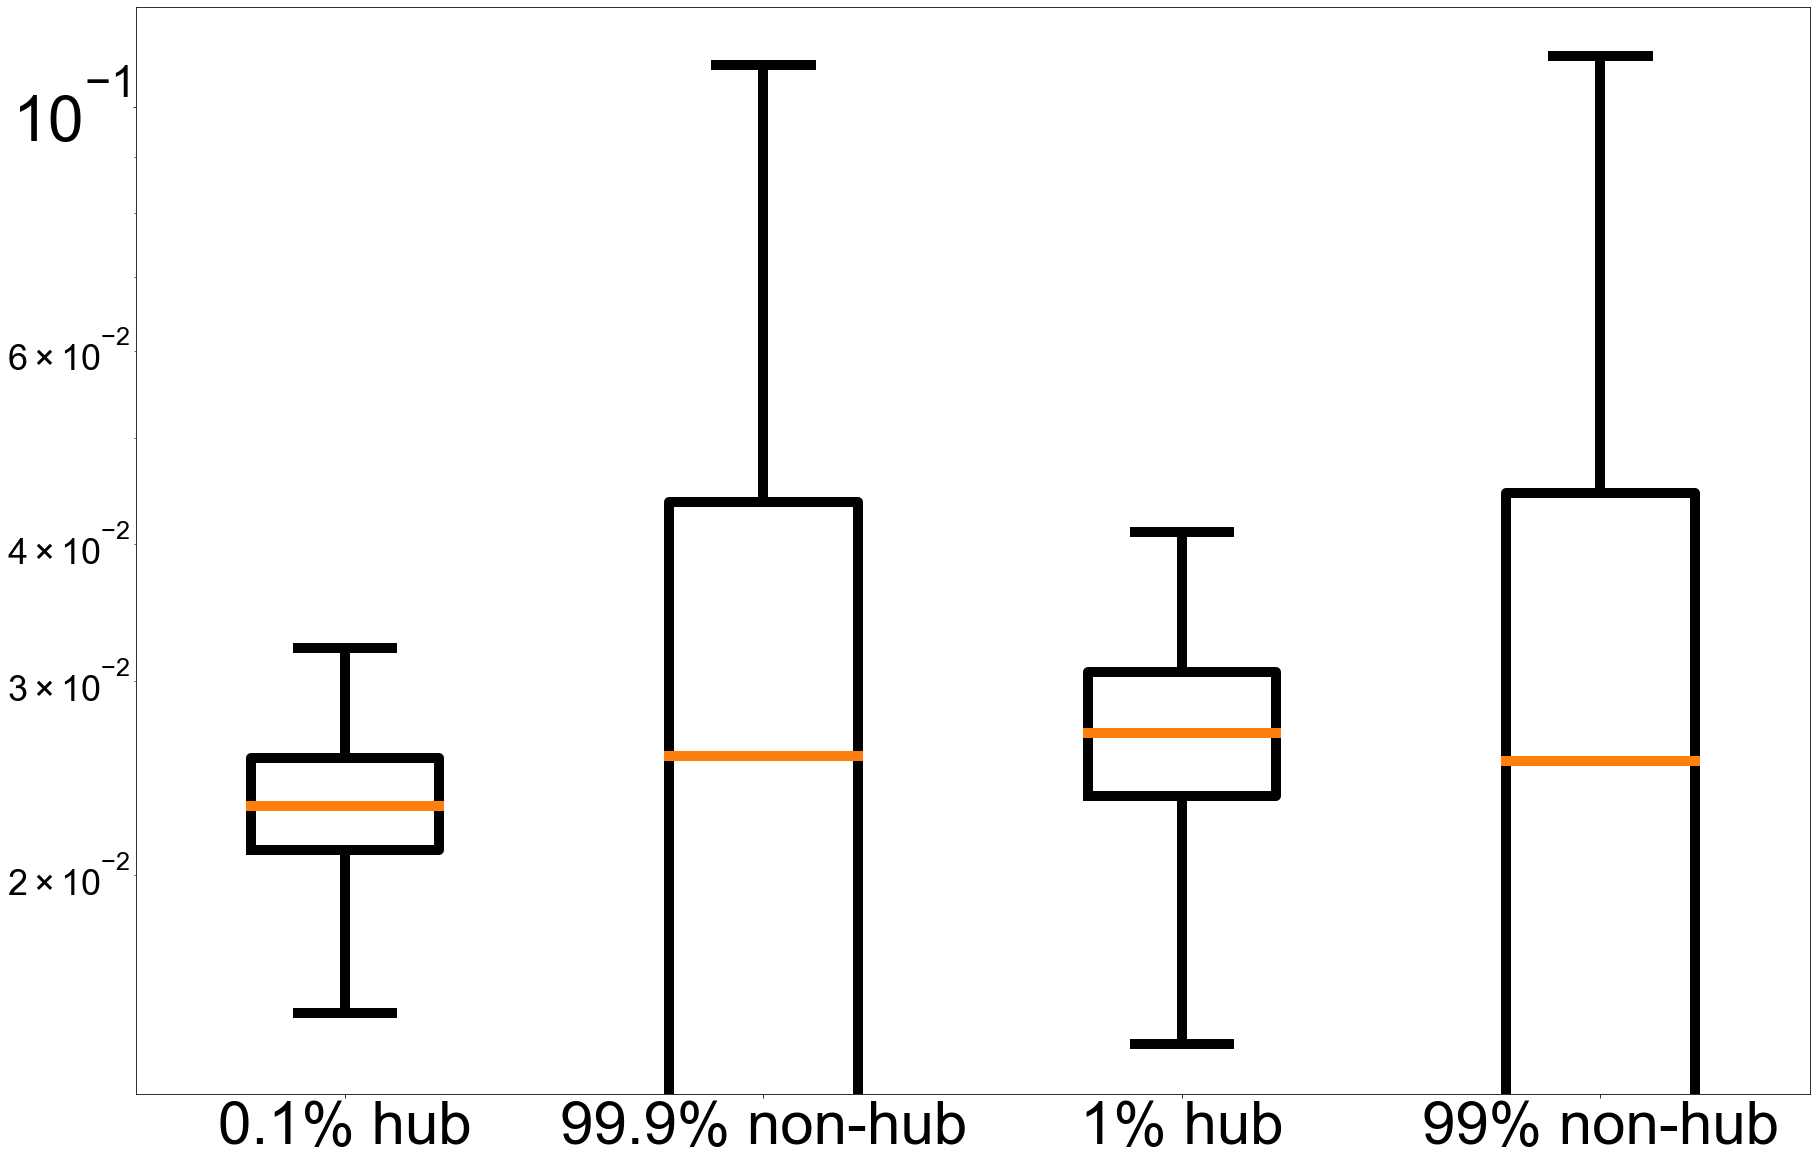

In [91]:
draw_boxplot_for_hub(result_list, "boxplot_post_similarity_of_outdegree_hub_non_hub", xlabel, 'posts similarity', [1, 2, 3, 4], xticks_fontsize=60, yticks_fontsize=64)

In [92]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(4):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.comments_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree = 0.1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 0.1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 1 and m.comments_similarity is not null;')

for i in range(4):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(4):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['comments_similarity'].tolist())))

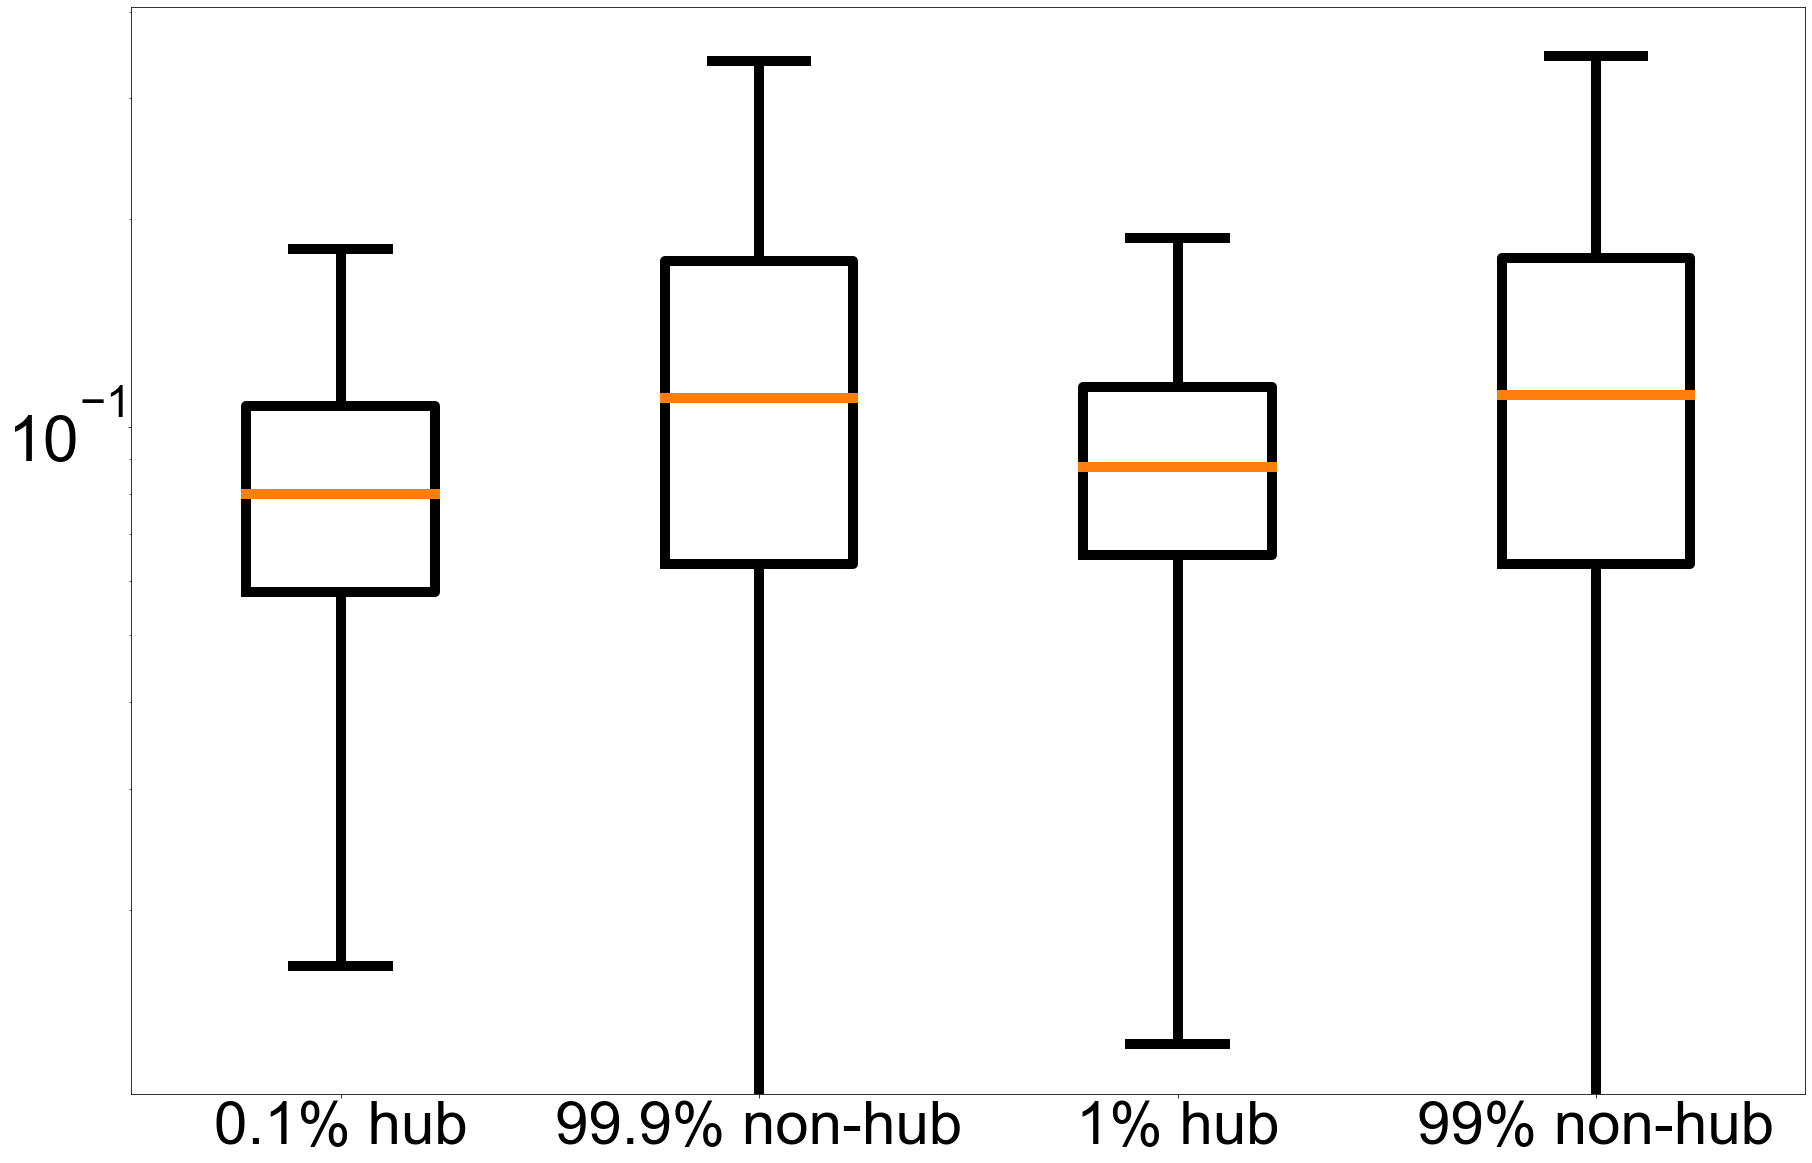

In [93]:
draw_boxplot_for_hub(result_list, "boxplot_comments_similarity_of_outdegree_hub_non_hub", xlabel, 'comments similarity', [1, 2, 3, 4], xticks_fontsize=60, yticks_fontsize=64)

## Indegree Hub's posts similarity & comments similarity & post count

In [94]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(4):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.posts_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree = 0.1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 0.1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 1 and m.posts_similarity is not null;')
sqls.append('select m.posts_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 1 and m.posts_similarity is not null;')

for i in range(4):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(4):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['posts_similarity'].tolist())))

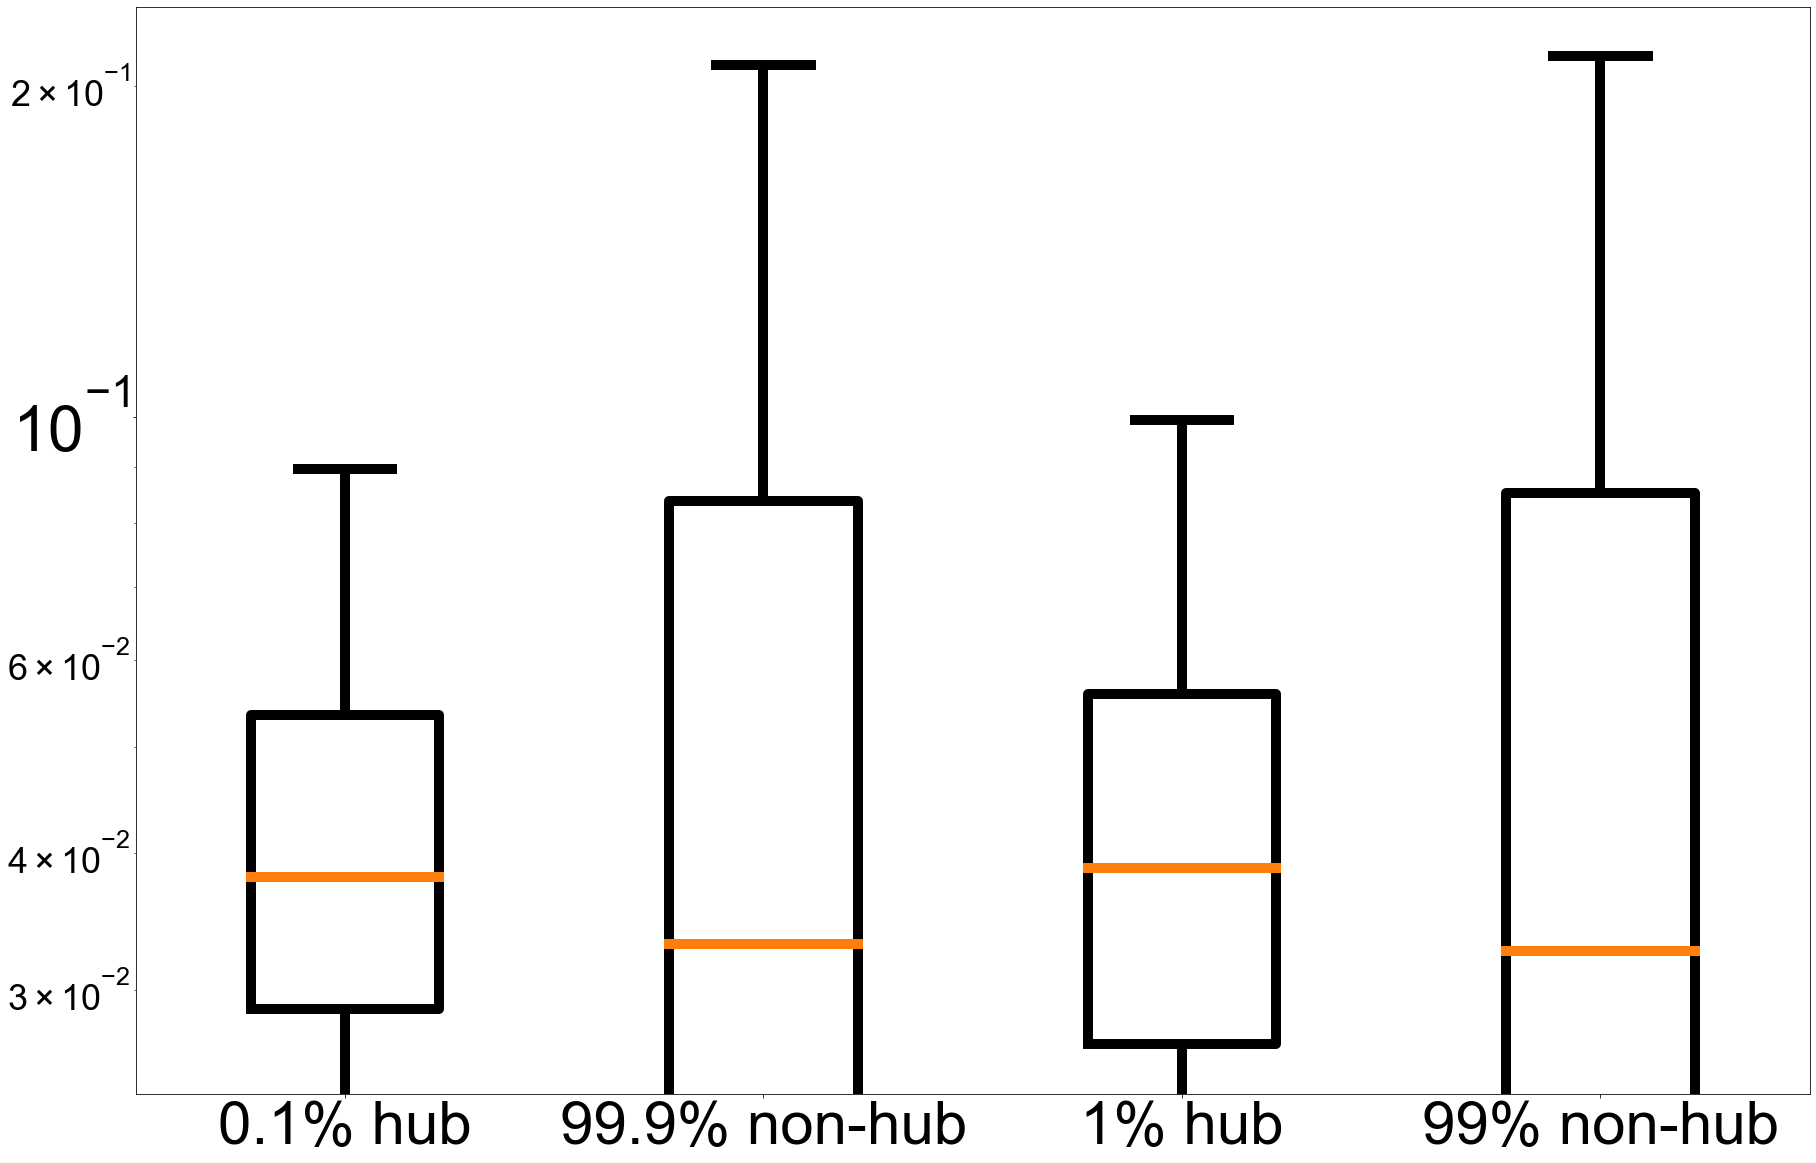

In [95]:
draw_boxplot_for_hub(result_list, "boxplot_posts_similarity_of_indegree_hub_non_hub", xlabel, 'posts similarity', [1, 2, 3, 4], xticks_fontsize=60, yticks_fontsize=64)

In [96]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(4):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.comments_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree = 0.1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 0.1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 1 and m.comments_similarity is not null;')
sqls.append('select m.comments_similarity from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 1 and m.comments_similarity is not null;')

for i in range(4):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(4):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['comments_similarity'].tolist())))

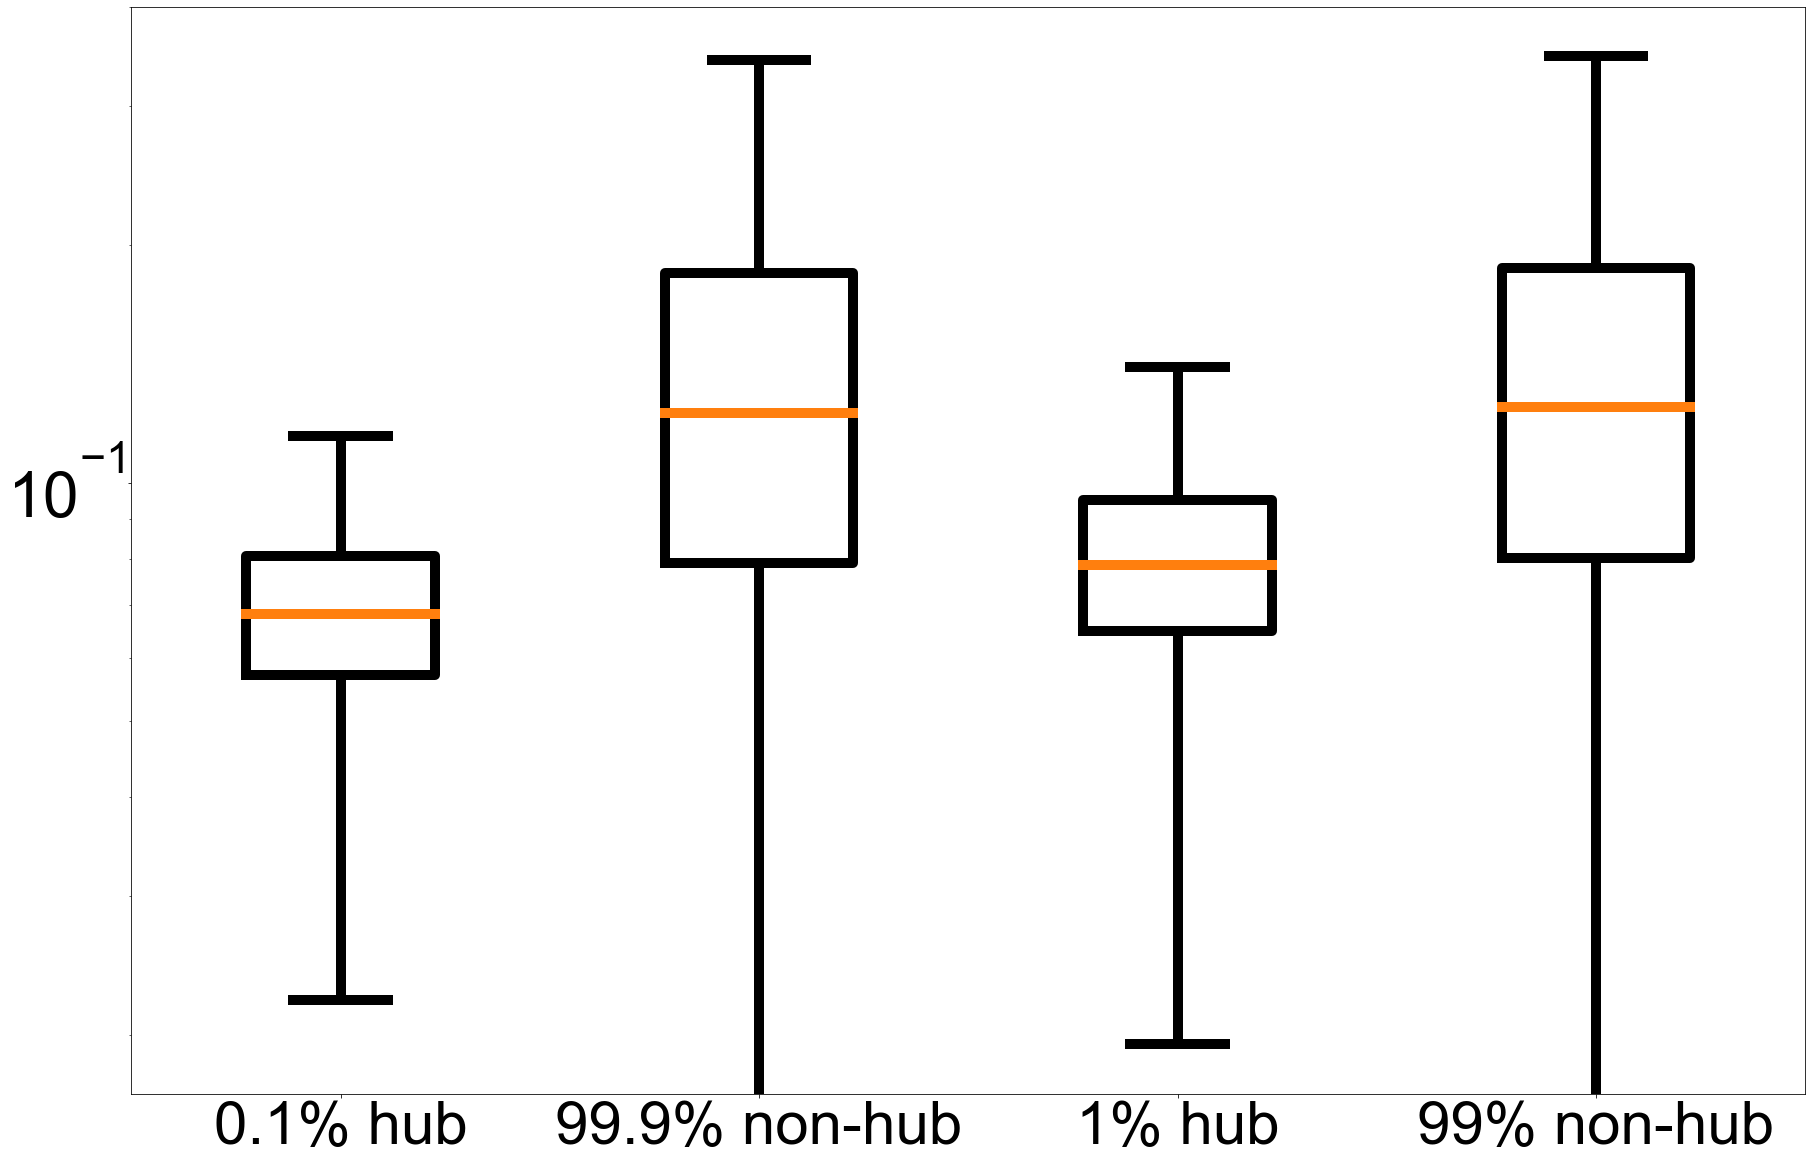

In [97]:
draw_boxplot_for_hub(result_list, "boxplot_comments_similarity_of_indegree_hub_non_hub", xlabel, 'comments similarity', [1, 2, 3, 4], xticks_fontsize=60, yticks_fontsize=64)

In [98]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(4):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.post_cnt from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree = 0.1;')
sqls.append('select m.post_cnt from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 0.1;')
sqls.append('select m.post_cnt from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 1;')
sqls.append('select m.post_cnt from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 1;')

for i in range(4):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(4):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['post_cnt'].tolist())))

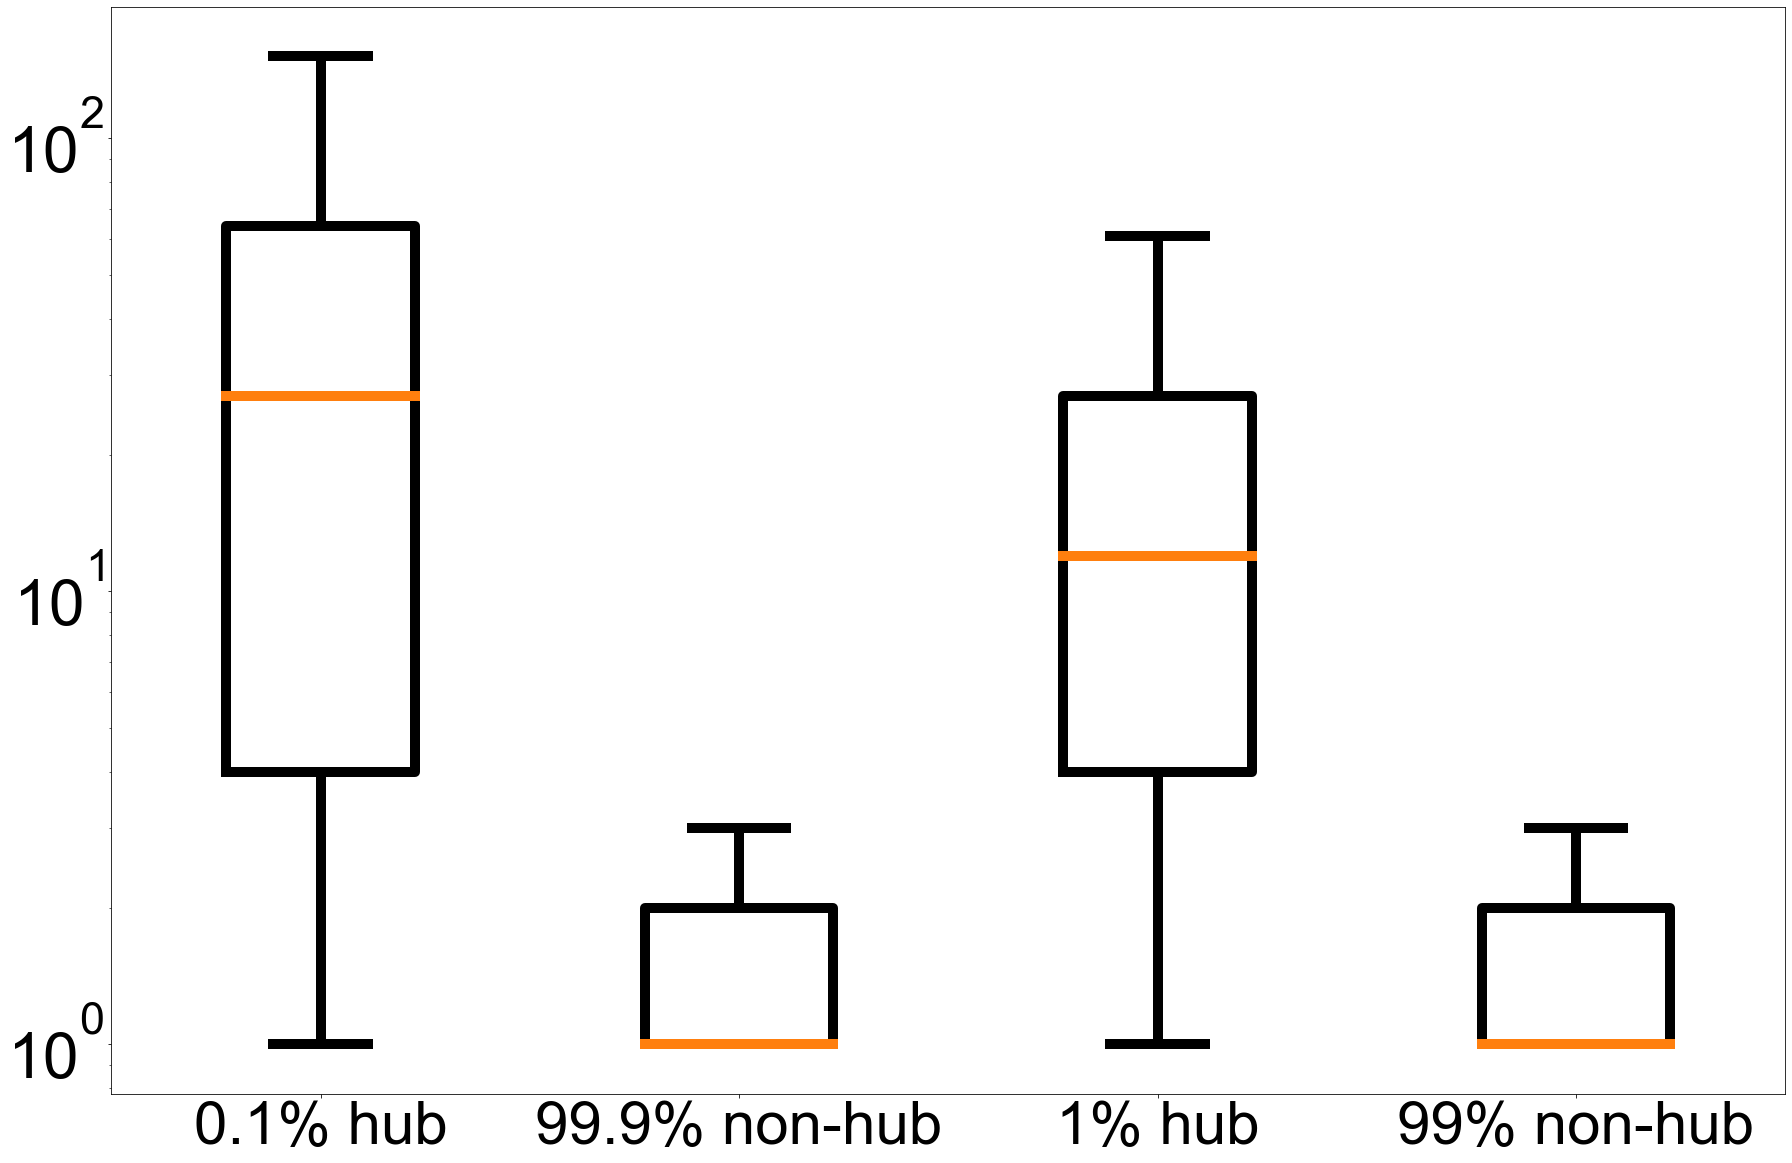

In [99]:
draw_boxplot_for_hub(result_list, "boxplot_post_count_of_indegree_hub_non_hub", xlabel, 'post count', [1, 2, 3, 4], xticks_fontsize=60, yticks_fontsize=64)

## Outdegree Hub's average IS, ES score

In [231]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(8):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree = 0.1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 0.1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree = 0.1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 0.1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 1;')


for i in range(8):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(0, 4):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_is_score'].tolist())))
    
for i in range(4, 8):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_es_score'].tolist())))

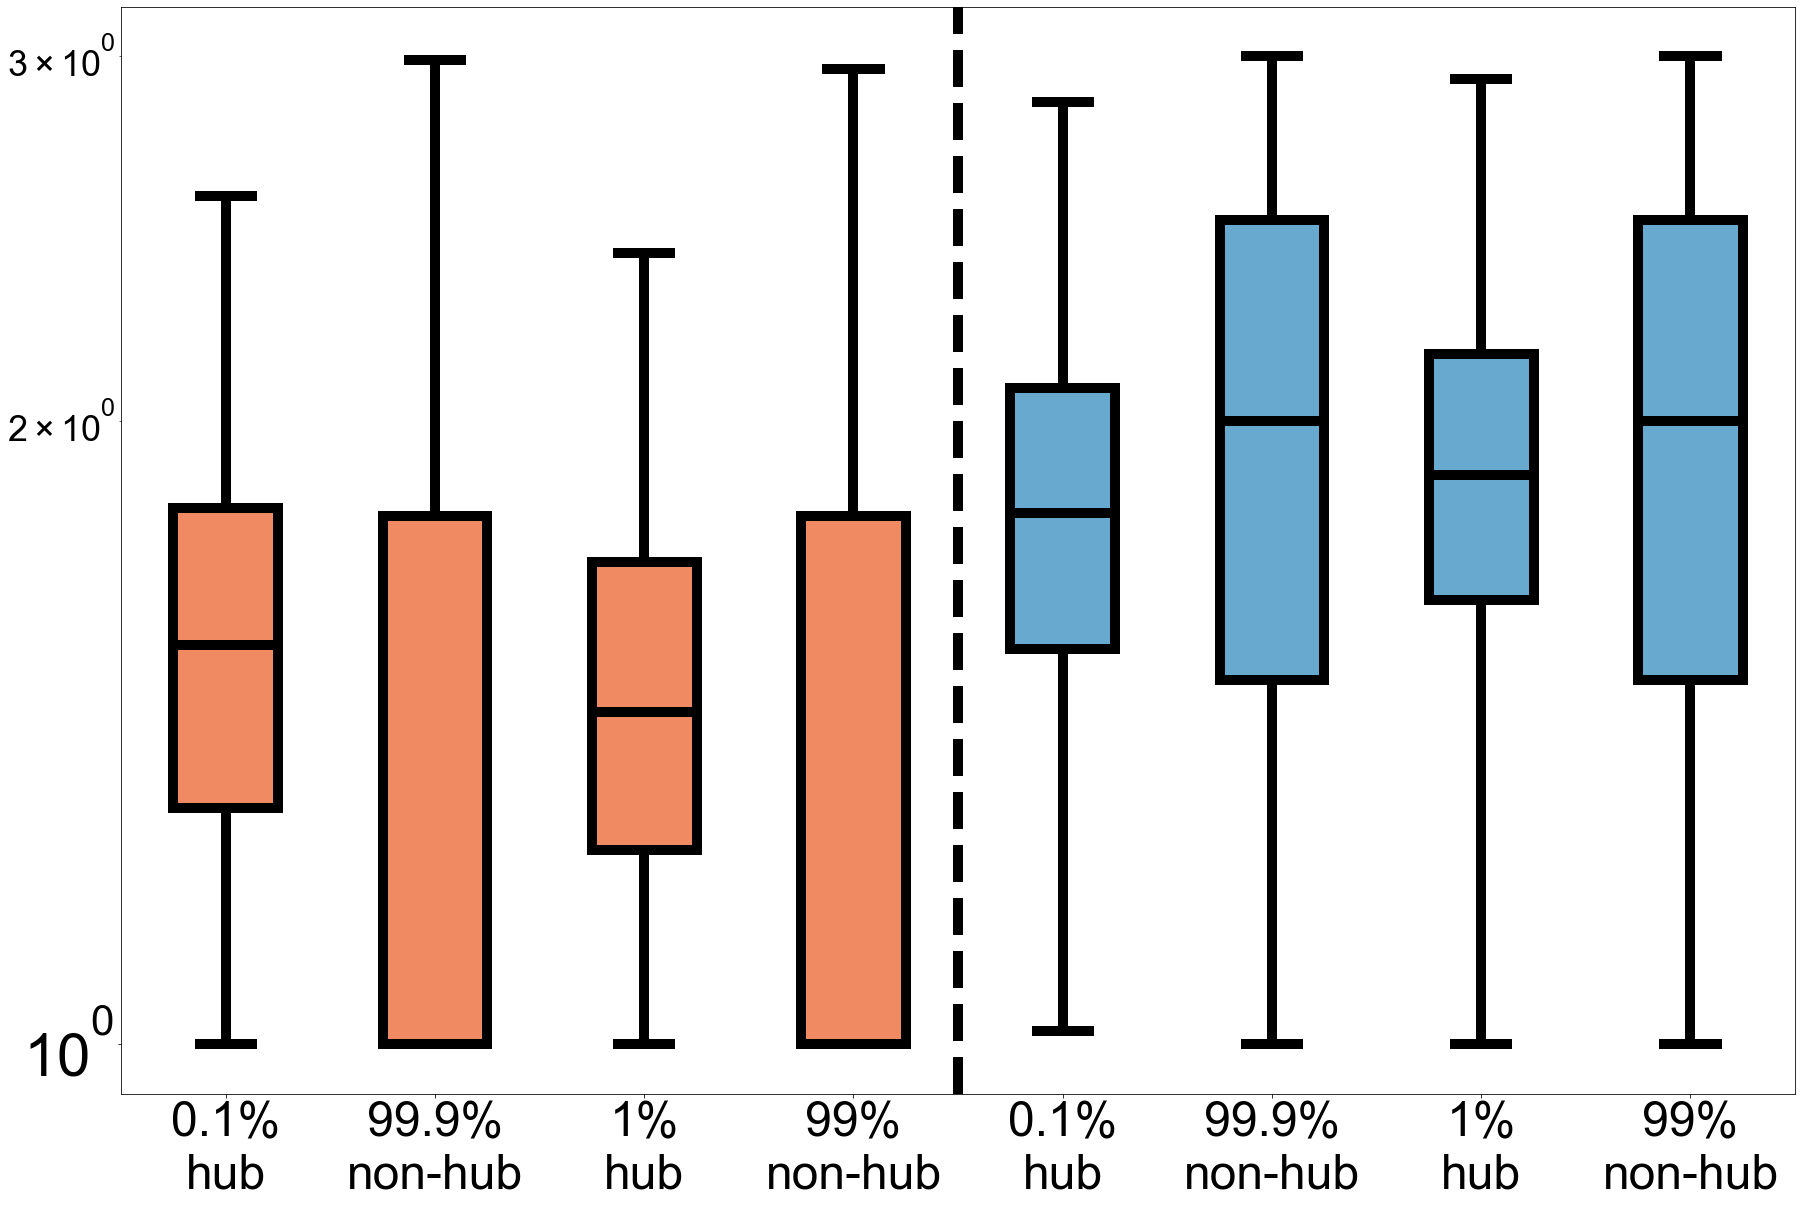

In [190]:
colors = ['#ef8a62', '#67a9cf']
newline = '\n'
xlabel = [f"0.1%{newline}hub", f"99.9%{newline}non-hub", f"1%{newline}hub", f"99%{newline}non-hub", f"0.1%{newline}hub", f"99.9%{newline}non-hub", f"1%{newline}hub", f"99%{newline}non-hub"]

draw_colored_boxplot_for_hub(result_list, "boxplot_average_is_es_outdegree_hub_non_hub", xlabel, 
                             'average score', [1, 2, 3, 4, 5, 6, 7, 8], xticks_fontsize=48, yticks_fontsize=60,
                             colors=colors, fill_box='color')

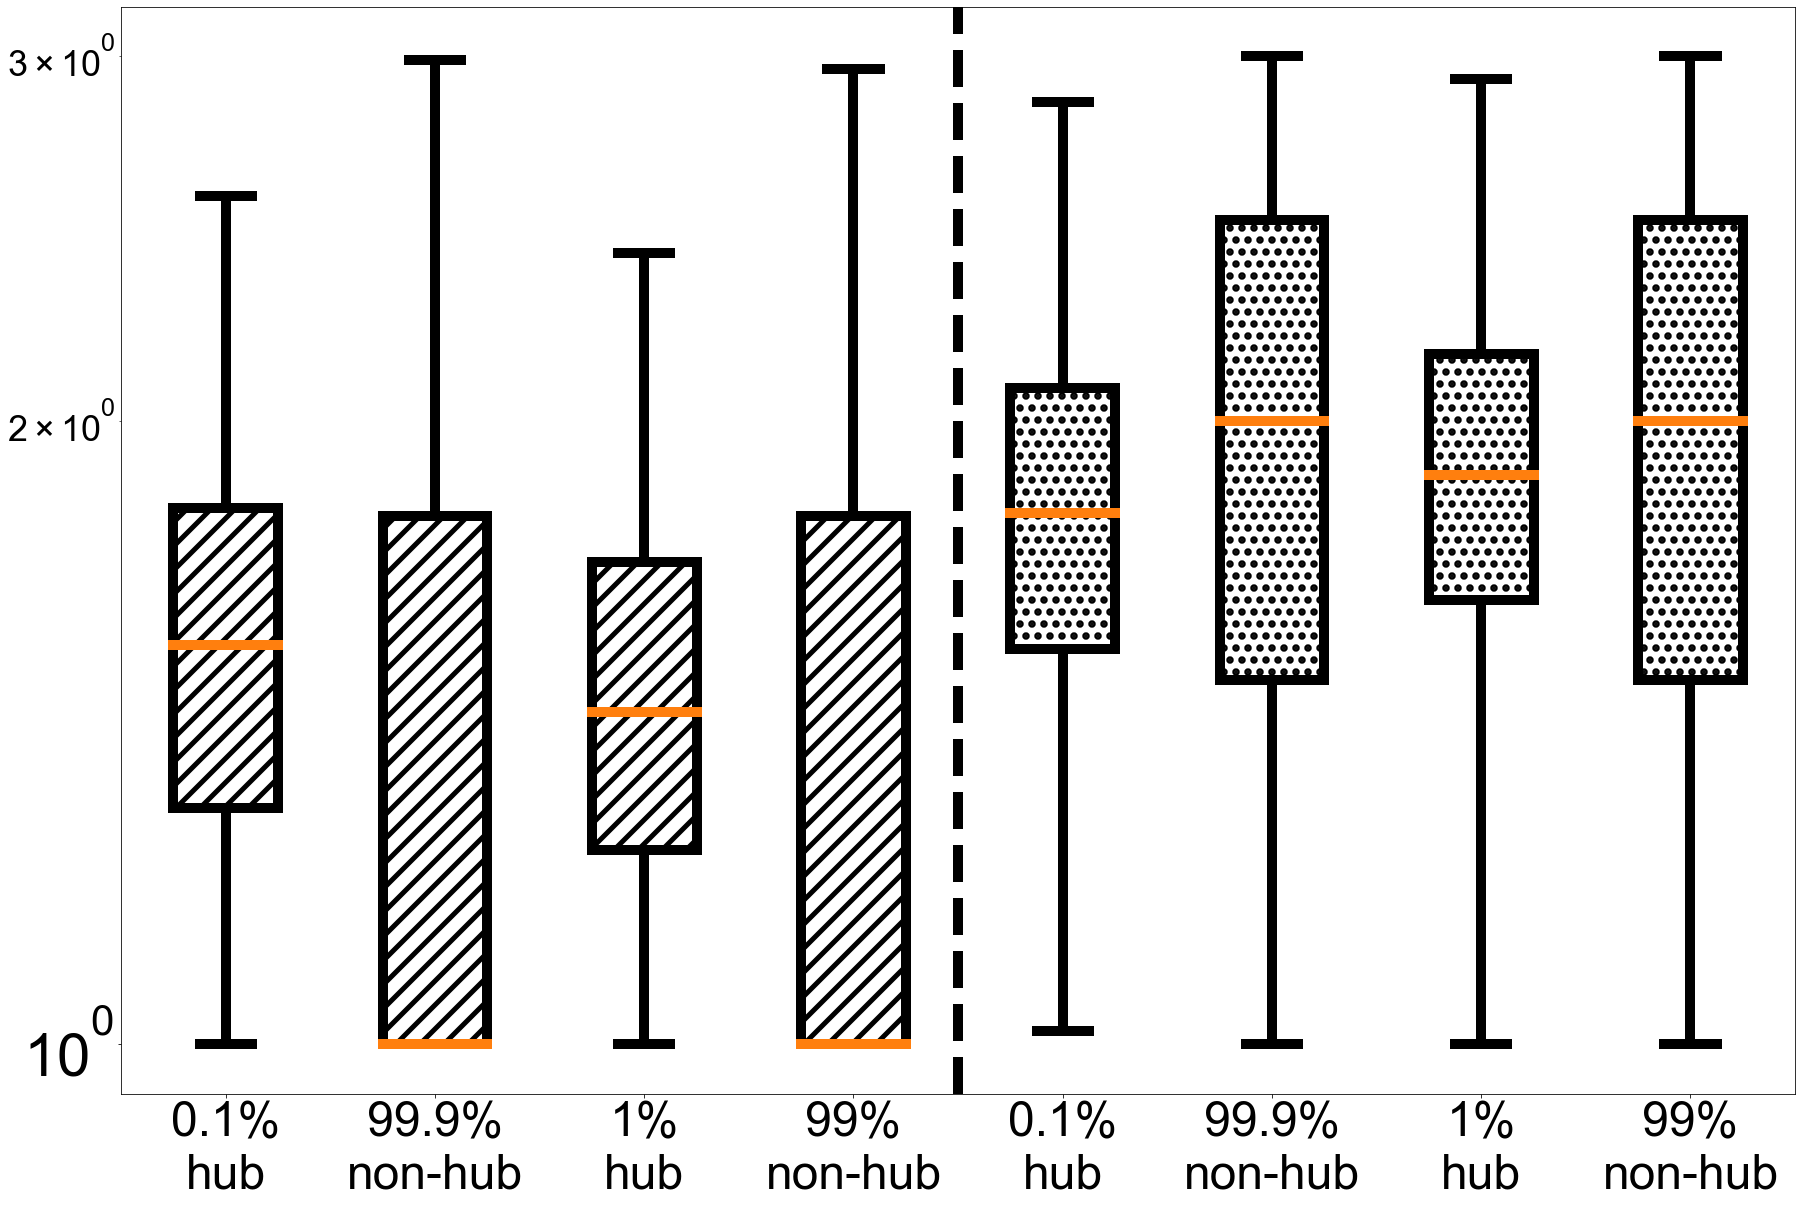

In [232]:
patterns = ['/', '.']
xlabel = [f"0.1%{newline}hub", f"99.9%{newline}non-hub", f"1%{newline}hub", f"99%{newline}non-hub", f"0.1%{newline}hub", f"99.9%{newline}non-hub", f"1%{newline}hub", f"99%{newline}non-hub"]

draw_colored_boxplot_for_hub(result_list, "boxplot_average_is_es_outdegree_hub_non_hub", xlabel, 
                             'average score', [1, 2, 3, 4, 5, 6, 7, 8], xticks_fontsize=48, yticks_fontsize=60,
                             fill_box='pattern', colors=[], patterns=patterns)

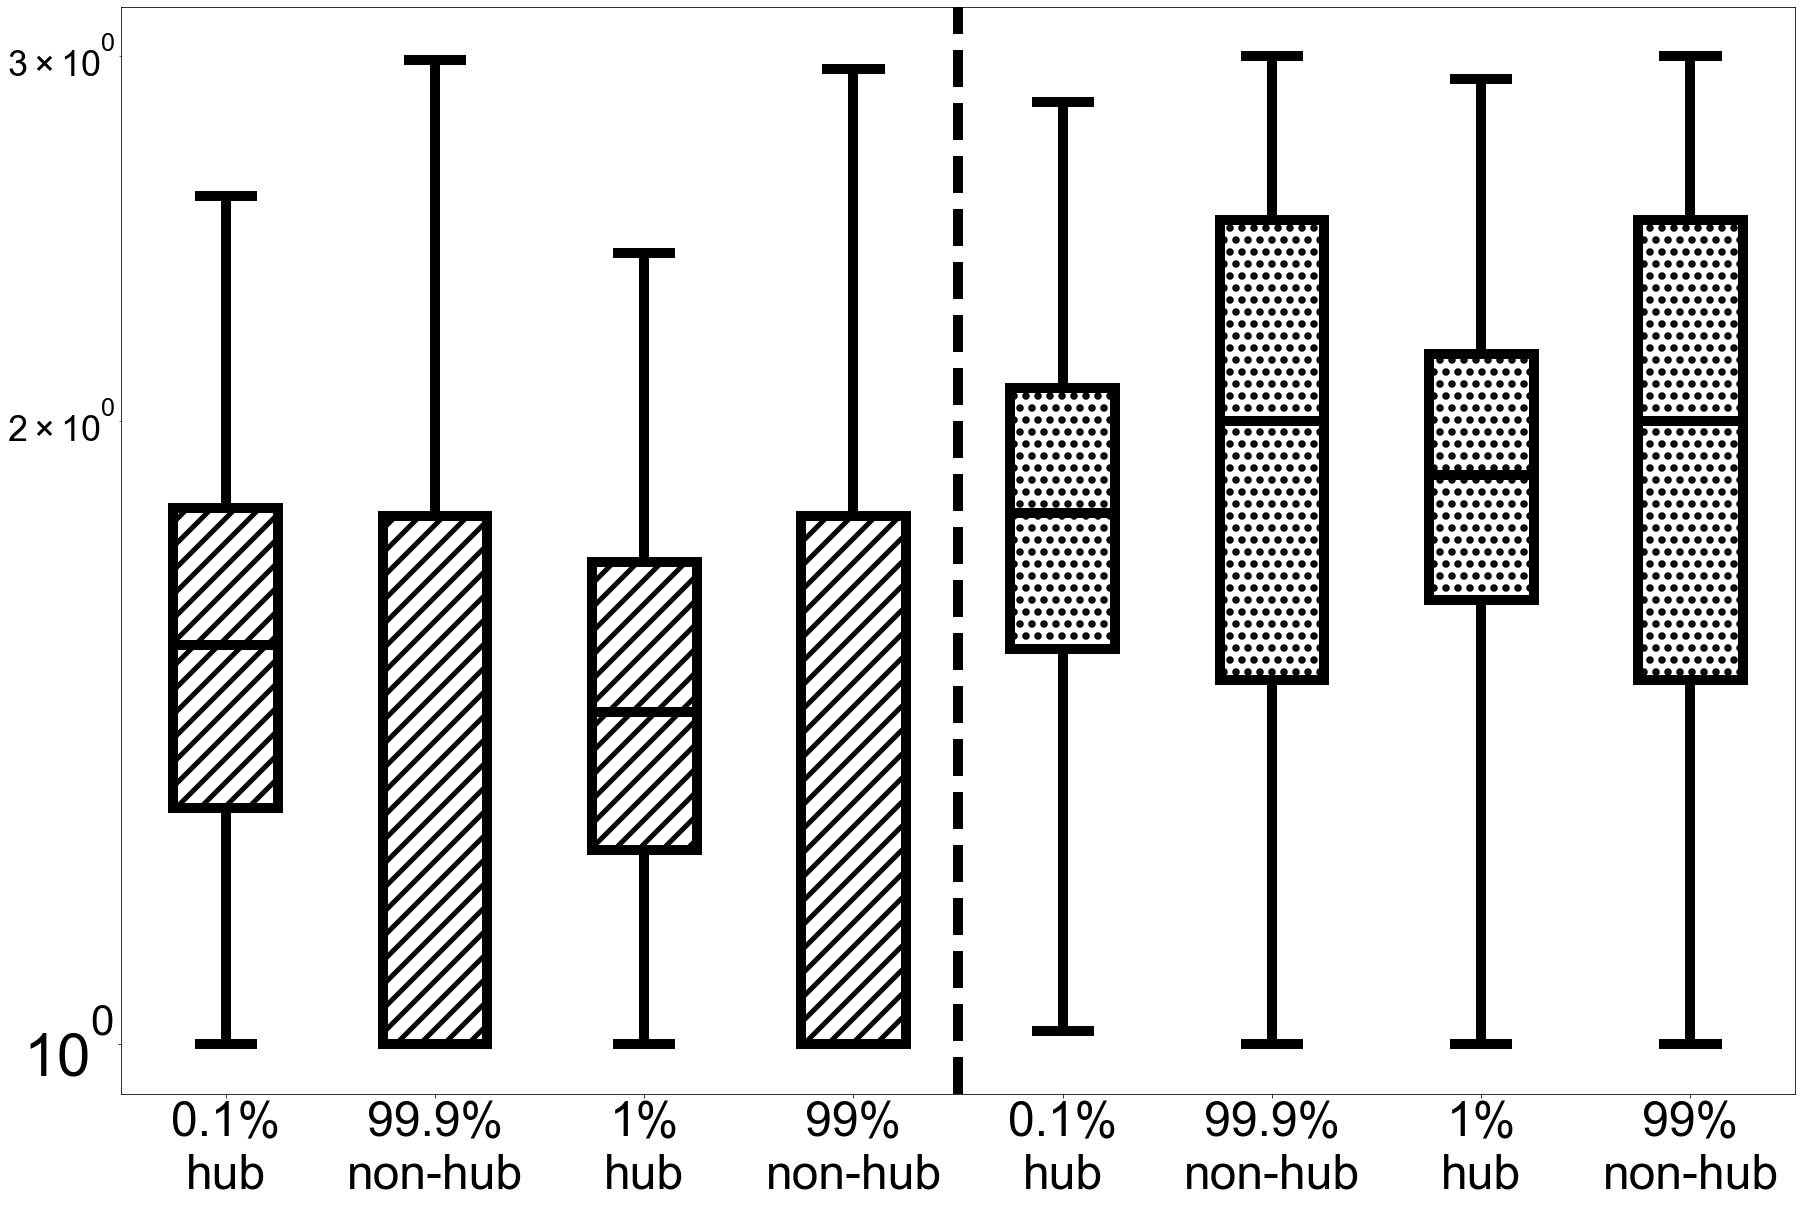

In [238]:
patterns = ['/', '.']
median_colors = ['black', 'black']
xlabel = [f"0.1%{newline}hub", f"99.9%{newline}non-hub", f"1%{newline}hub", f"99%{newline}non-hub", f"0.1%{newline}hub", f"99.9%{newline}non-hub", f"1%{newline}hub", f"99%{newline}non-hub"]

draw_colored_boxplot_for_hub(result_list, "boxplot_average_is_es_outdegree_hub_non_hub", xlabel, 
                             'average score', [1, 2, 3, 4, 5, 6, 7, 8], xticks_fontsize=48, yticks_fontsize=60,
                             fill_box='pattern', colors=median_colors, patterns=patterns, median_colors=median_colors)

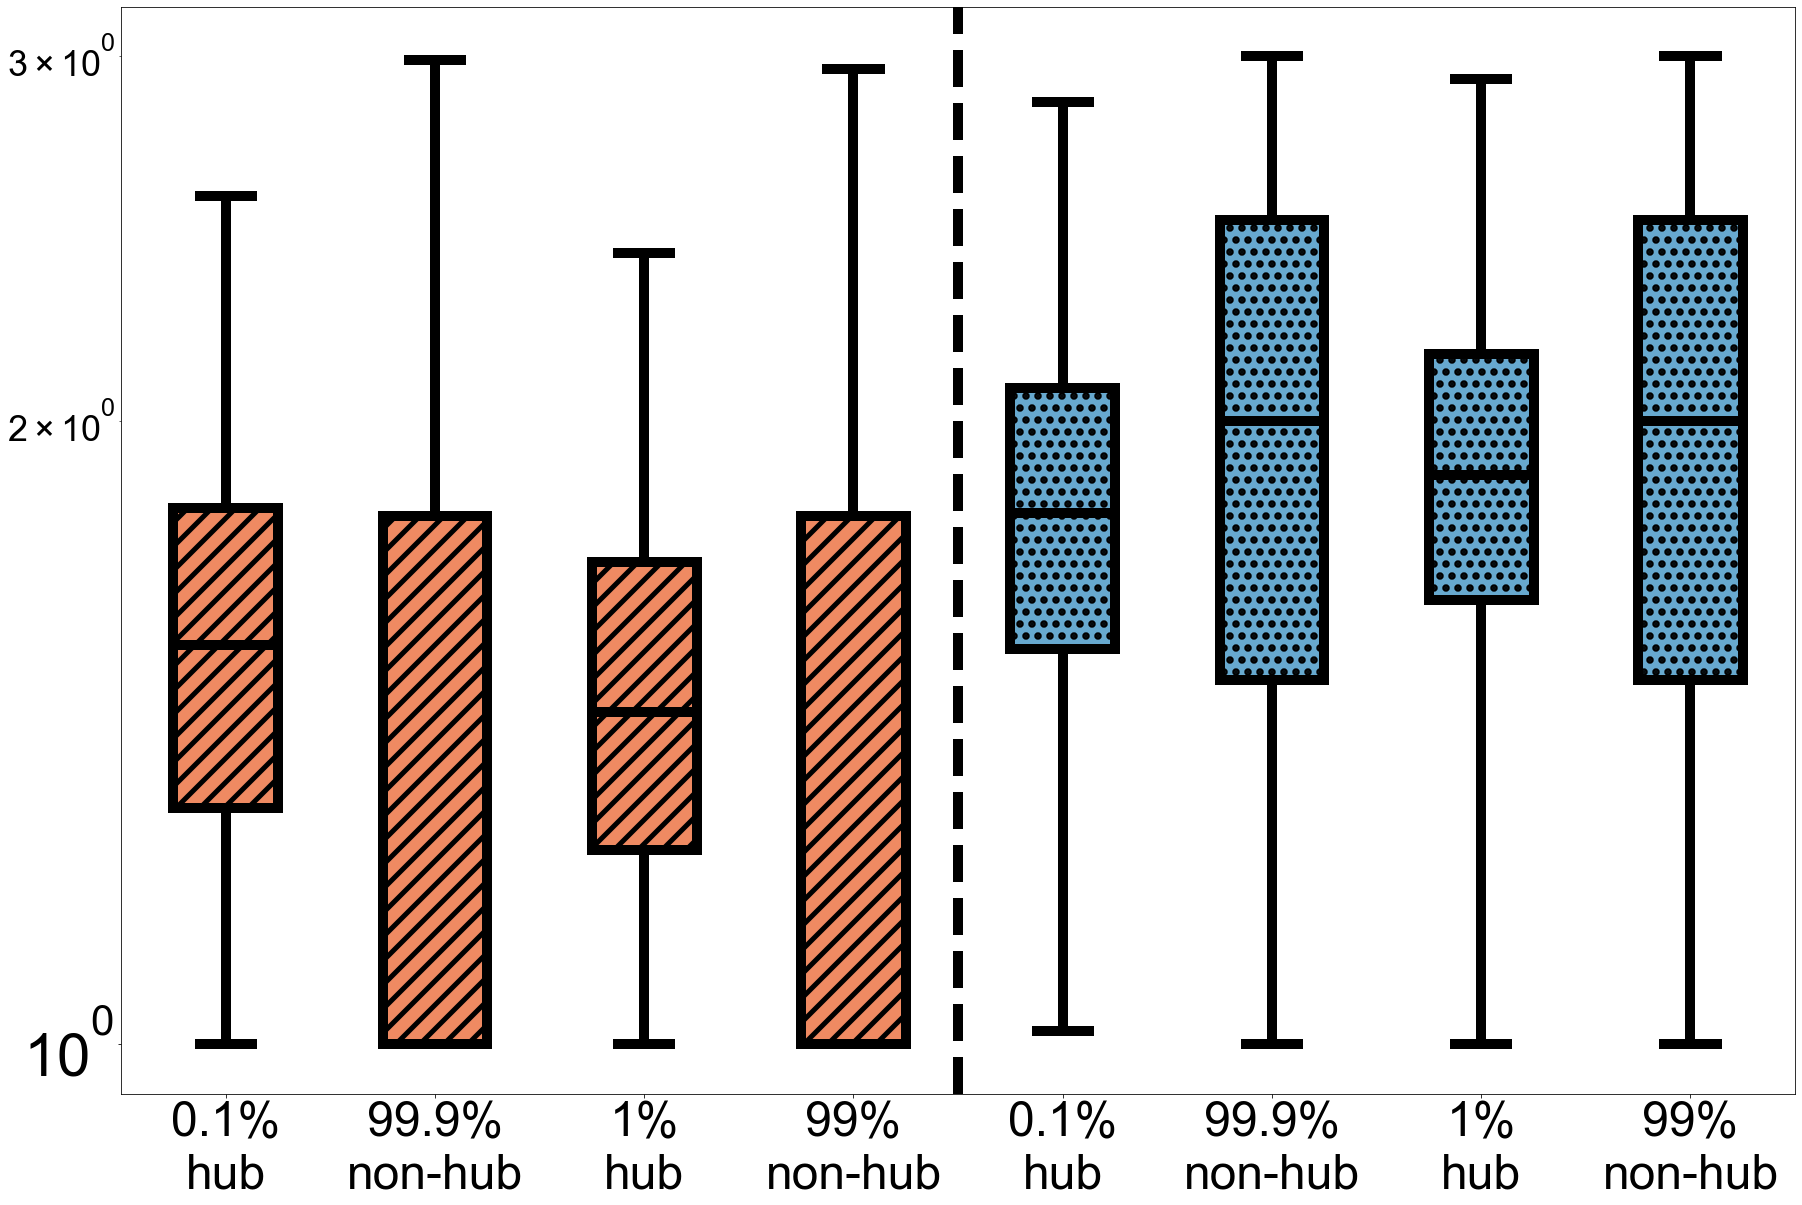

In [217]:
colors = ['#ef8a62', '#67a9cf']
patterns = ['/', '.']
xlabel = [f"0.1%{newline}hub", f"99.9%{newline}non-hub", f"1%{newline}hub", f"99%{newline}non-hub", f"0.1%{newline}hub", f"99.9%{newline}non-hub", f"1%{newline}hub", f"99%{newline}non-hub"]

draw_colored_boxplot_for_hub(result_list, "boxplot_average_is_es_outdegree_hub_non_hub", xlabel, 
                             'average score', [1, 2, 3, 4, 5, 6, 7, 8], xticks_fontsize=48, yticks_fontsize=60,
                             fill_box='both', colors=colors, patterns=patterns)

## Indegree Hub's average IS, ES score

In [226]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(8):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_indegree = 0.1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_indegree > 0.1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_indegree <= 1;')
sqls.append('select m.average_is_score from nodes n, mentor m where n.node_id = m.author and n.top_k_indegree > 1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_indegree = 0.1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_indegree > 0.1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_indegree <= 1;')
sqls.append('select m.average_es_score from nodes n, mentor m where n.node_id = m.author and n.top_k_indegree > 1;')


for i in range(8):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(0, 4):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_is_score'].tolist())))
    
for i in range(4, 8):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_es_score'].tolist())))

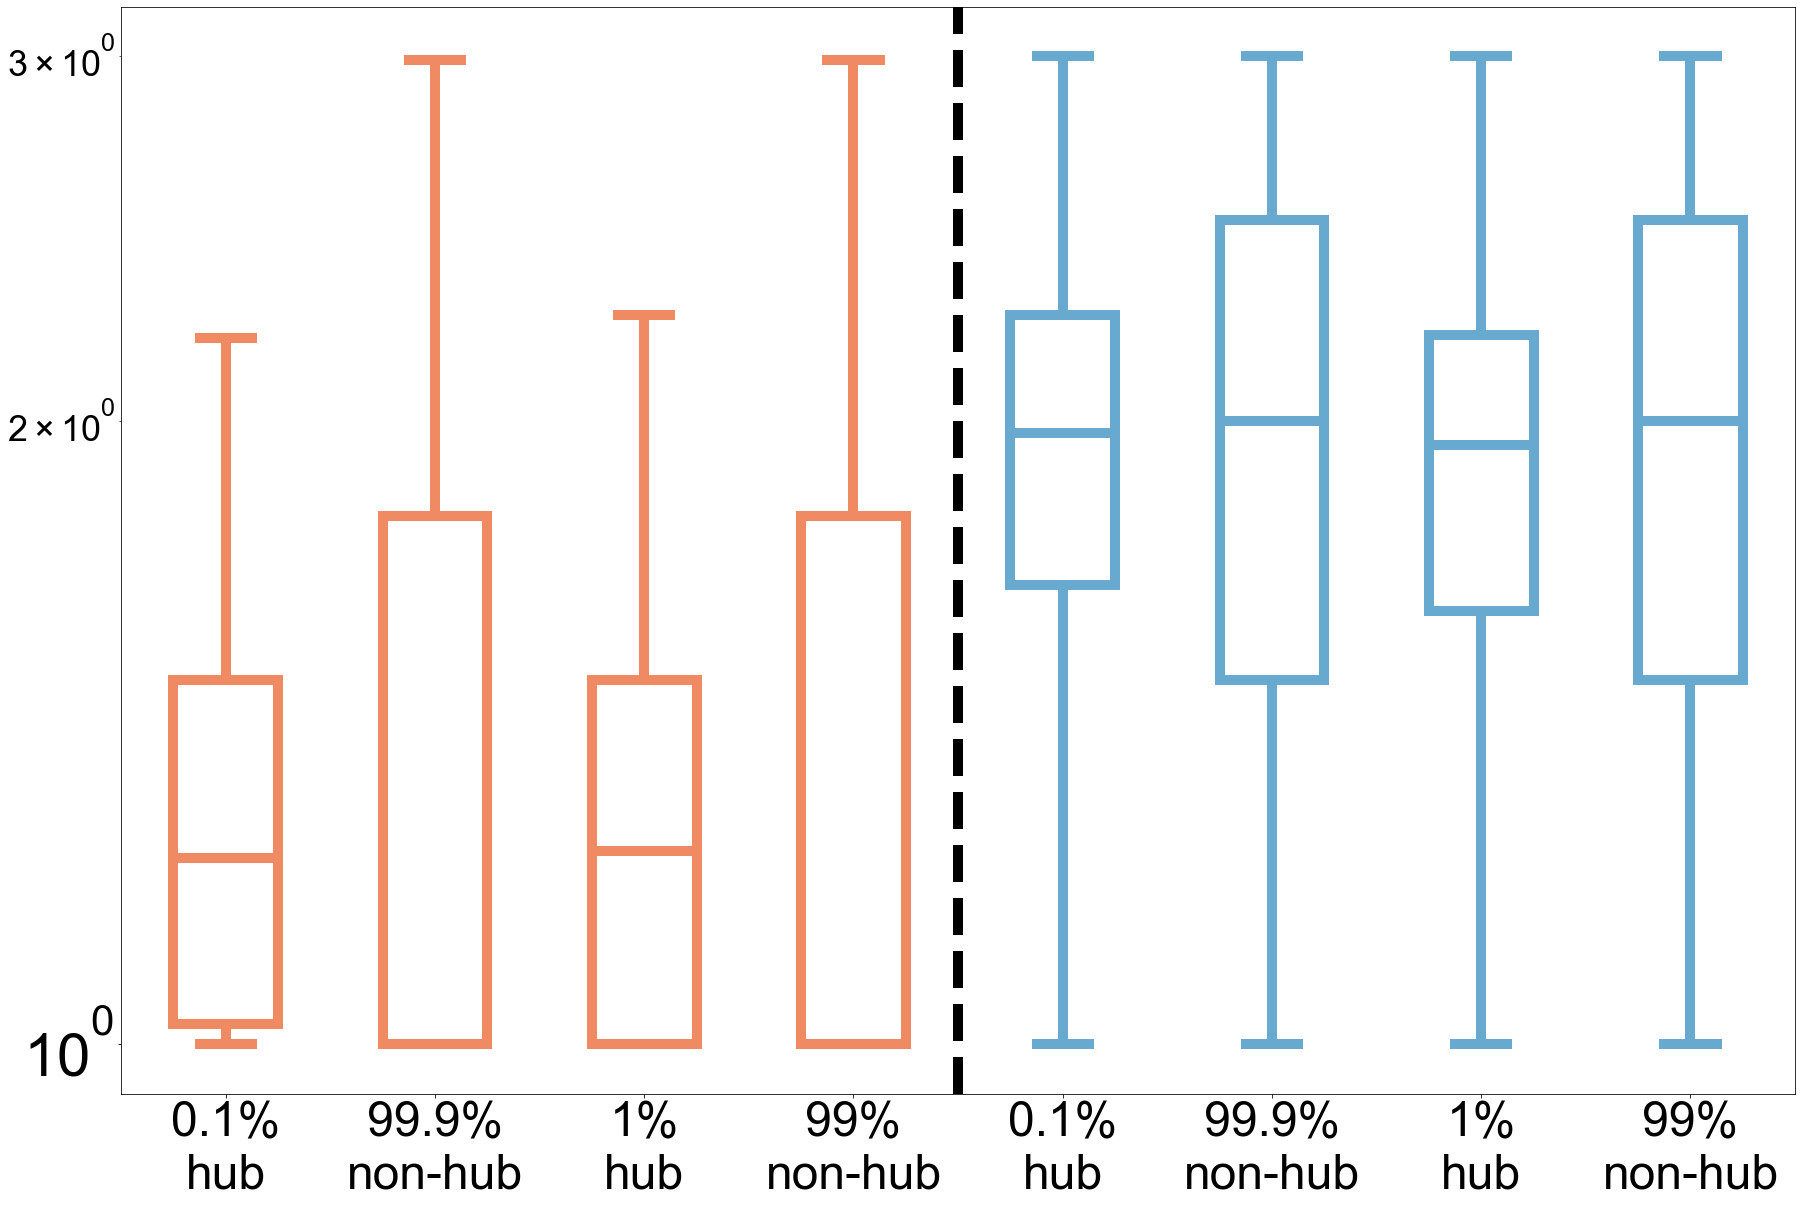

In [229]:
colors = ['#ef8a62', '#67a9cf']
newline = '\n'
xlabel = [f"0.1%{newline}hub", f"99.9%{newline}non-hub", f"1%{newline}hub", f"99%{newline}non-hub", f"0.1%{newline}hub", f"99.9%{newline}non-hub", f"1%{newline}hub", f"99%{newline}non-hub"]

draw_colored_boxplot_for_hub(result_list, "boxplot_average_is_es_indegree_hub_non_hub", xlabel, 
                             'average score', [1, 2, 3, 4, 5, 6, 7, 8], xticks_fontsize=48, yticks_fontsize=60,
                             fill_box='None', colors=colors, patterns=[], median_colors=colors)

## Outdegree Hub's average vote

In [194]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(4):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.average_vote from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree = 0.1;')
sqls.append('select m.average_vote from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 0.1;')
sqls.append('select m.average_vote from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree <= 1;')
sqls.append('select m.average_vote from nodes n, mentor m where n.node_id = m.author and n.top_k_outdegree > 1;')

for i in range(4):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(4):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_vote'].tolist())))

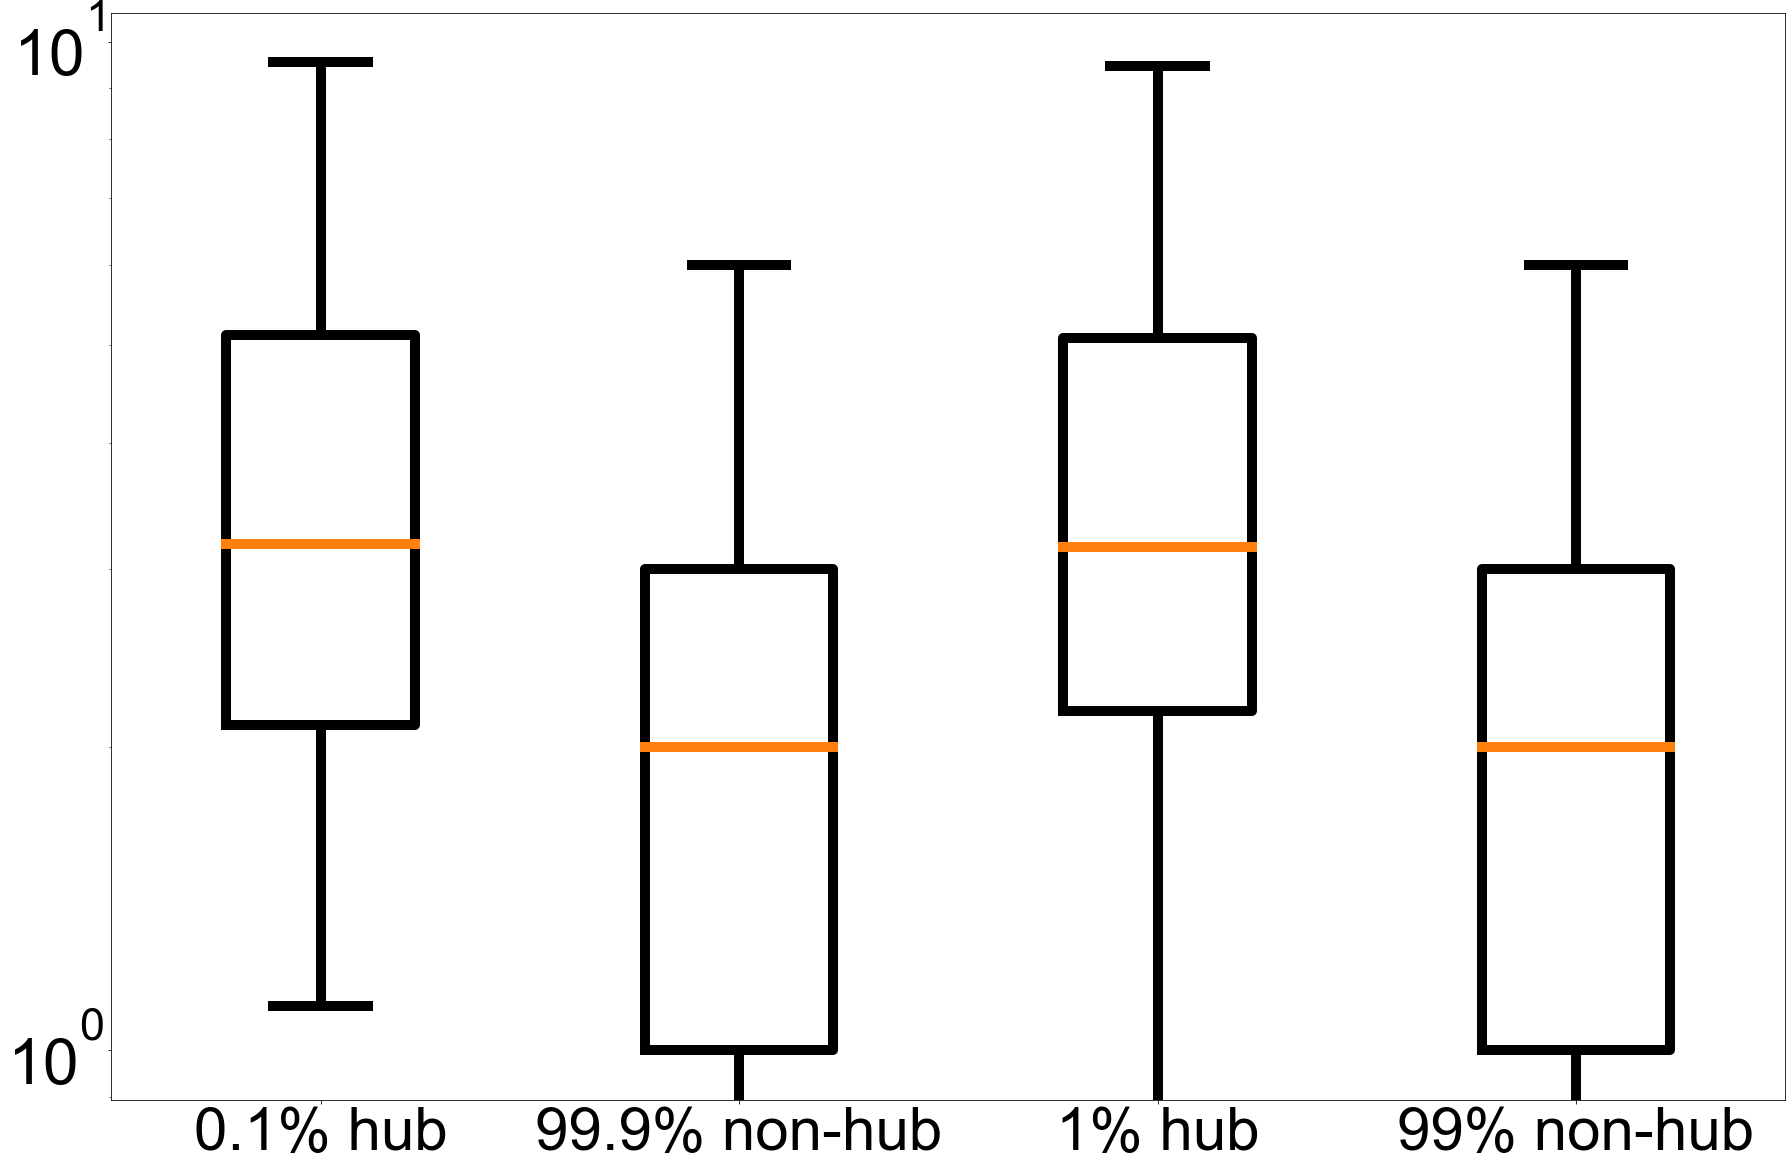

In [195]:
xlabel = ['0.1% hub', '99.9% non-hub', '1% hub', '99% non-hub']
draw_boxplot_for_hub(result_list, "boxplot_average_vote_outdegree_hub_non_hub", xlabel, 'average vote', [1, 2, 3, 4], xticks_fontsize=60, yticks_fontsize=64)

## Indegree Hub's average vote (comments)

In [196]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursors = []
sqls = []
results = []
result_list = []
for i in range(4):
    cursors.append(connection.cursor(pymysql.cursors.DictCursor))

sqls.append('select m.average_comments_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree = 0.1 and m.average_comments_vote is not null;')
sqls.append('select m.average_comments_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 0.1 and m.average_comments_vote is not null;')
sqls.append('select m.average_comments_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree <= 1 and m.average_comments_vote is not null;')
sqls.append('select m.average_comments_vote from nodes n, mentee m where n.node_id = m.author and n.top_k_indegree > 1 and m.average_comments_vote is not null;')

for i in range(4):
    cursors[i].execute(sqls[i])
    # result가 dict 형태로 return.
    results.append(cursors[i].fetchall())

connection.close()

for i in range(4):
    results[i] = pd.DataFrame(results[i])
    # decimal을 float형으로 형 변환.
    results[i] = results[i].apply(pd.to_numeric, downcast='float')
    result_list.append(list(np.array(results[i]['average_comments_vote'].tolist())))

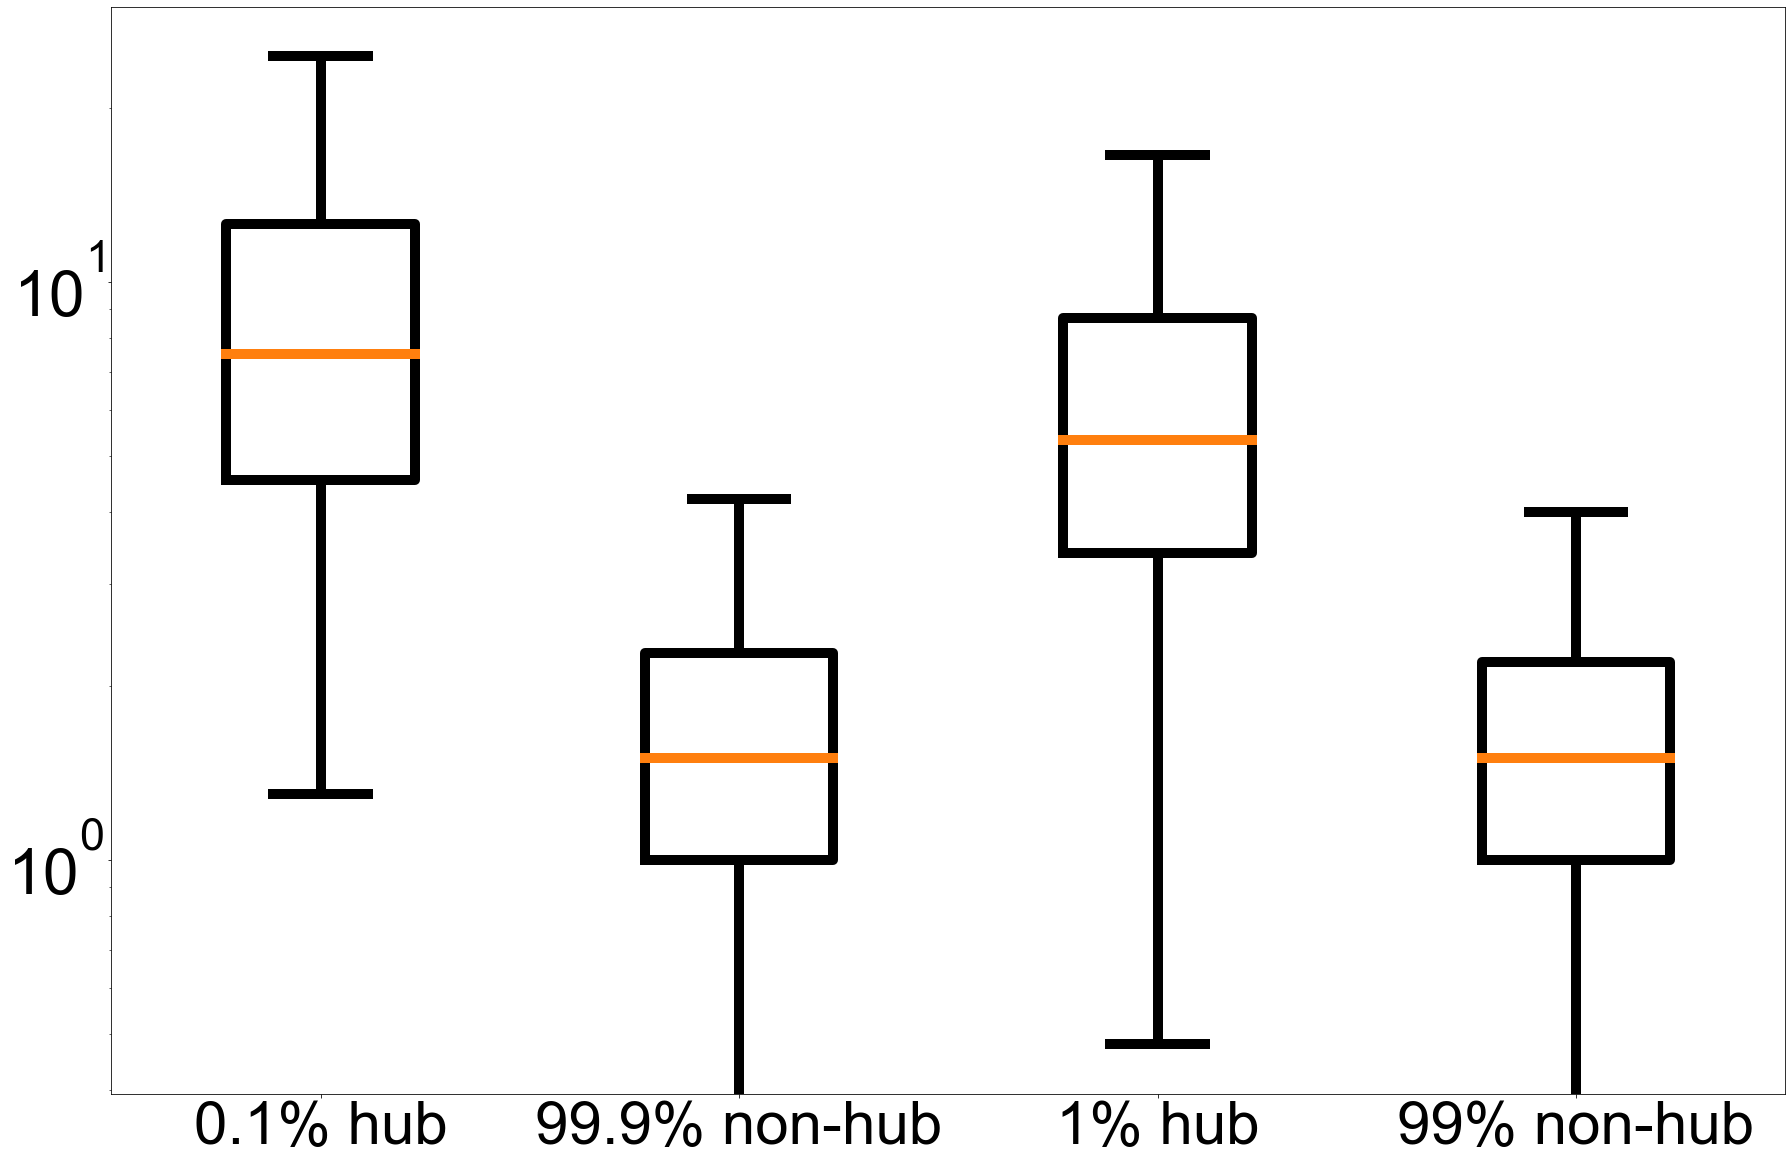

In [197]:
xlabel = ['0.1% hub', '99.9% non-hub', '1% hub', '99% non-hub']
draw_boxplot_for_hub(result_list, "boxplot_average_vote_of_comments_indegree_hub_non_hub", xlabel, 'average comments vote', [1, 2, 3, 4], xticks_fontsize=60, yticks_fontsize=64)